# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [16]:
# Import warnings
import warnings
warnings.filterwarnings(action='ignore')

In [17]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

#!pip install --upgrade matplotlib



# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [21]:
# Try loading one file

df = pd.read_parquet('trip_records/2023-1.parquet')
df.info()

#shape of the dataset
print (df.shape)

# check first 5 records
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [22]:
# We can cehck the total number of records in the dataset, consider only one column and check the shape.

import os
import time
import psutil

# We have all files in the "trip_records" folder so read that folder.
folder_path = "./trip_records"

files = os.listdir(folder_path)

df_list = []
column_name = 'tpep_pickup_datetime'

# Start time
start_time = time.time()

for file_name in files :
    file_path = os.path.join(folder_path, file_name) # concatinate the folder path
    temp_df = pd.read_parquet(file_path, columns=[column_name])
    df_list.append(temp_df)


df = pd.concat(df_list, ignore_index=True)  # Concatenate all DataFrames

# End time
end_time = time.time()

# Check memory usage
memory_usage = df.memory_usage(deep=True).sum() / (1024**2)  # Convert to MB

# Print results
print(f"DataFrame Shape: {df.shape}")
print(f"Memory Usage: {memory_usage:.2f} MB")
print(f"Loading Time: {end_time - start_time:.2f} seconds")


DataFrame Shape: (37928560, 1)
Memory Usage: 289.37 MB
Loading Time: 0.72 seconds


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

How many rows are there?
- One month ('2023-1.parquet'): 3041714 rows and 19 columns
- All months: 37928560

Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?
- No, Handling 37,928,560 rows at once can be computationally demanding, leading to several potential challenges:
    + High memory usage: Large datasets may exceed available RAM, causing slowdowns or crashes.
    + Slow processing: Operations like filtering, aggregations, and visualizations can take significantly longer. 
    + Storage constraints: The dataset could be several gigabytes, making it difficult to load and manipulate efficiently

To handle this, we need to sample a fraction of data from each of the files. How to go about that?
- Random Sampling (Simple Approach).
- Stratified Sampling (More Representative Approach).
- Time-Based Sampling.


#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [29]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [30]:
# from google.colab import drive
# drive.mount('/content/drive')

In [31]:
print(os.getcwd())
original_path = os.getcwd()
os.chdir(os.path.join(os.getcwd(), "trip_records"))

/Users/kafuwale/Desktop/Personal/learning/upgrad/EDA case study/Datasets and Dictionary/Assignment/Starter Notebook - EDA NYC Taxi


In [32]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files

# Create a list of all the twelve files to read
file_list = os.listdir()

df = pd.DataFrame()

for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        
        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        # Convert datetime column to pandas datetime format
        monthly_data["tpep_pickup_datetime"] = pd.to_datetime(monthly_data["tpep_pickup_datetime"])
        
        # Ensure we only consider records from 2023 (avoid any unexpected years)
        monthly_data = monthly_data[monthly_data["tpep_pickup_datetime"].dt.year == 2023]

        # Extract date and hour from pickup datetime
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour
        
        # Create an empty DataFrame to store sampled data for the month
        sampled_data = pd.DataFrame()

        # Extract unique dates in the month
        unique_dates = monthly_data["tpep_pickup_datetime"].dt.date.unique()

        # Iterate over each date
        for date in unique_dates:
            # Filter data for the date
            daily_data = monthly_data[monthly_data["tpep_pickup_datetime"].dt.date == date]

            # uncomment below line to debug
            #print(date)
            #print(file_path)
            #print(daily_data['hour'].unique())
            
            # Iterate through each unique hour
            for hour in daily_data['hour'].unique():  # Iterate only over existing hours
                hourly_data = daily_data[daily_data["hour"] == hour] # filter by hours
                
                if not hourly_data.empty:  # Avoid errors for empty hour slots
                    sample = hourly_data.sample(frac=0.05, random_state=42)  # Sample 5% data
                    sampled_data = pd.concat([sampled_data, sample])

                    #print(file_path)
                    #print(date)
                    #print(hour)
                    #print((sampled_data))
        
        # Append the sampled monthly data to the final dataset and reset the index
        df = pd.concat([df, sampled_data], ignore_index=True)
            
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


        

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [34]:
# Store the df in csv/parquet

# reset the file path
os.chdir(original_path)

total_records = len(df)

df = df.sample(frac=300000/total_records, random_state=42)
df.to_csv("nyc_taxi_sampled.csv", index=False)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1655717 to 765111
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289698 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289698 non-null  float64       
 6   store_and_fwd_flag     289698 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  flo

(300000, 22)

In [228]:
total_records

1896399

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [37]:
# Load the new data file
df = pd.read_csv('nyc_taxi_sampled.csv')


In [38]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-15 22:27:39   2023-03-15 22:49:21              2.0   
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2         1  2023-01-06 10:40:06   2023-01-06 11:27:30              1.0   
3         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
4         2  2023-06-08 19:18:44   2023-06-08 19:27:16              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.97         1.0                  N            48           262   
1           3.39         1.0                  N           231           230   
2           0.00         1.0                  N           138           230   
3           0.95         1.0                  N           246           186   
4           1.97         1.0                  N           143           238   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.69           0.0   
1             1  ...      0.5        5.38           0.0   
2             1  ...      0.5       11.85          13.1   
3             1  ...      0.5        4.74           0.0   
4             1  ...      0.5        1.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         29.59                   2.5          0.0   
1                    1.0         32.28                   2.5          0.0   
2                    1.0         71.10                   2.5          NaN   
3                    1.0         20.54                   2.5          0.0   
4                    1.0         19.60                   2.5          0.0   

         date  hour airport_fee  
0  2023-03-15    22         NaN  
1  2023-12-07    23         NaN  
2  2023-01-06    10        1.25  
3  2023-11-28    19         NaN  
4  2023-06-08    19         NaN  

[5 rows x 22 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289698 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289698 non-null  float64
 6   store_and_fwd_flag     289698 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [42]:
# Fix the index and drop any columns that are not needed
# Drop unnecessary columns
columns_to_drop = ['date', 'hour']  # Drop columns used for sampling
df = df.drop(columns=columns_to_drop)
# Reset index
df = df.reset_index(drop=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [44]:
# Combine the two airport fee columns

df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])
df.drop(columns='airport_fee', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289698 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289698 non-null  float64
 6   store_and_fwd_flag     289698 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [46]:
# check where values of fare amount are negative

df_negative_filtered = df[df['fare_amount'] < 0]
print(df_negative_filtered.head())

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [48]:
# Analyse RatecodeID for the negative fare amounts
# No columns found with negative fare amount.

df_negative_filtered =  df[df['fare_amount'] < 0]
df_analyse_ratecode = df_negative_filtered['RatecodeID'].value_counts()
print(df_analyse_ratecode)

Series([], Name: count, dtype: int64)


In [49]:
# Find which columns have negative values

numeric_df = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
negative_columns = numeric_df.columns[(numeric_df < 0).any()]
print(negative_columns.tolist())

['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']


In [50]:
# fix these negative values
df[numeric_df.columns] = numeric_df.where(numeric_df >= 0, 0)

# Reconfirm
#numeric_df = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
#negative_columns = numeric_df.columns[(numeric_df < 0).any()]
#print(negative_columns.tolist())

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [53]:
# Find the proportion of missing values in each column



VendorID                 0.000
tpep_pickup_datetime     0.000
tpep_dropoff_datetime    0.000
passenger_count          0.000
trip_distance            0.000
RatecodeID               0.000
store_and_fwd_flag       3.434
PULocationID             0.000
DOLocationID             0.000
payment_type             0.000
fare_amount              0.000
extra                    0.000
mta_tax                  0.000
tip_amount               0.000
tolls_amount             0.000
improvement_surcharge    0.000
total_amount             0.000
congestion_surcharge     0.000
Airport_fee              0.000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [55]:
# Display the rows with null values
df[df.isnull().any(axis=1)]

# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)

df["passenger_count"].value_counts() # check if the 0 values are imputed

passenger_count
1.0    217616
2.0     43979
0.0     14948
3.0     11016
4.0      6131
5.0      3794
6.0      2511
8.0         3
7.0         2
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [58]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
df["RatecodeID"].value_counts() # check if the 0 values are imputed

RatecodeID
1.0     273516
2.0      11379
0.0      10302
99.0      1675
5.0       1591
3.0        981
4.0        555
6.0          1
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [60]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)
df["congestion_surcharge"].value_counts() # check if the 0 values are imputed


congestion_surcharge
2.5    267513
0.0     32487
Name: count, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [62]:
# Handle any remaining missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)
print("====================")

# Numeric Columns (int64, float64)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Categorical Columns (object, string)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


print(df.isnull().sum())

                    Missing Values  Percentage
store_and_fwd_flag           10302       3.434
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [65]:
# Describe the data and check if there are any potential outliers present
print(df.describe())


            VendorID  passenger_count  trip_distance     RatecodeID  \
count  300000.000000    300000.000000  300000.000000  300000.000000   
mean        1.732557         1.324067       4.106408       1.584077   
std         0.448164         0.913534     152.908183       7.312202   
min         1.000000         0.000000       0.000000       0.000000   
25%         1.000000         1.000000       1.040000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         8.000000   56823.800000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      165.329187     163.966047       1.164290      19.858079   
std        64.007886      69.842351       0.509431      18.295014   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.0

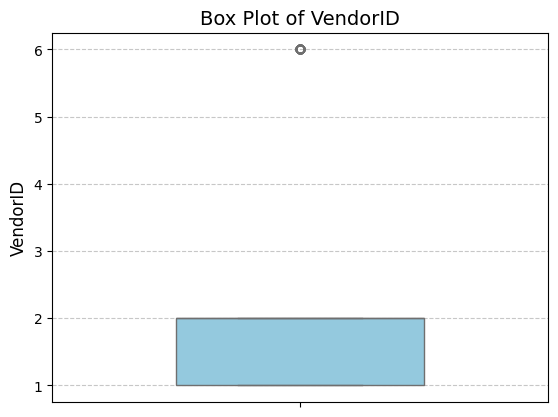

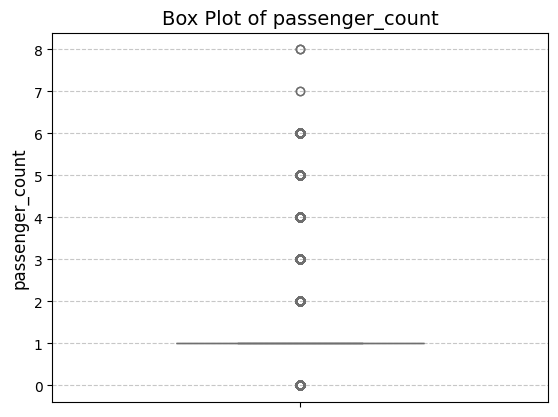

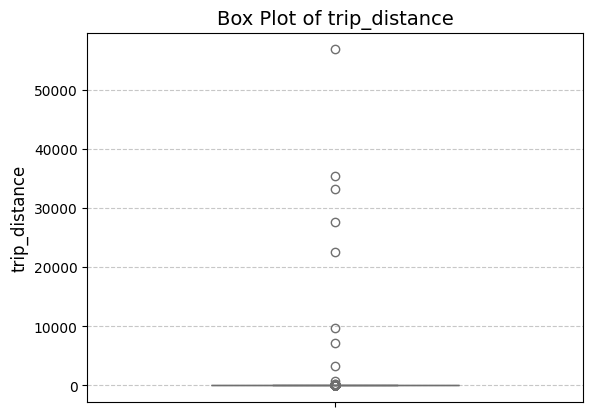

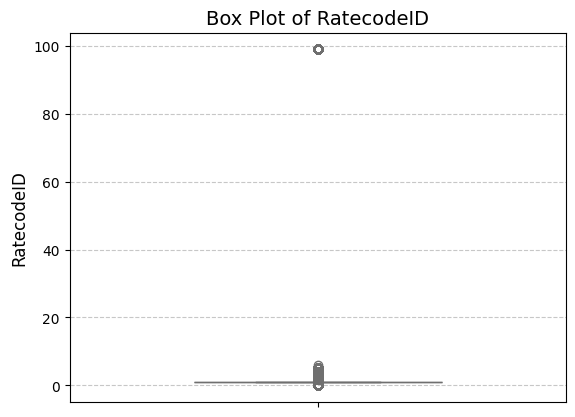

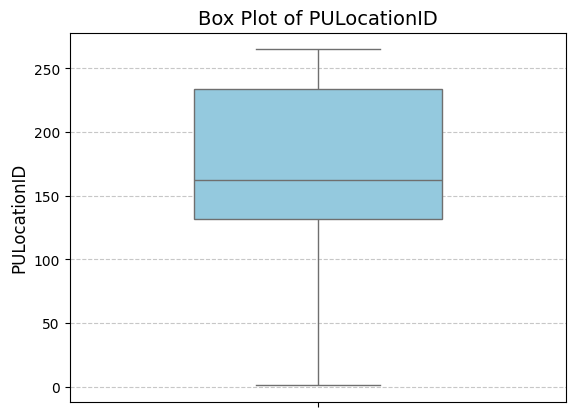

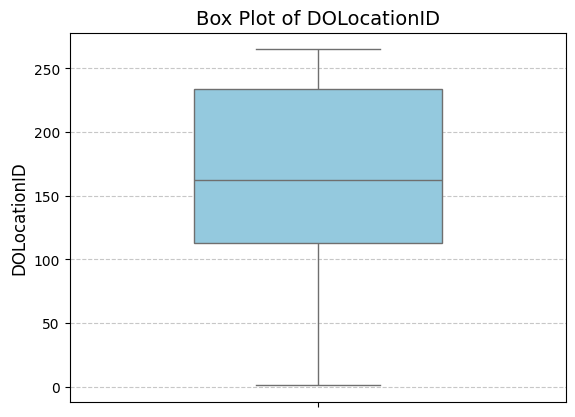

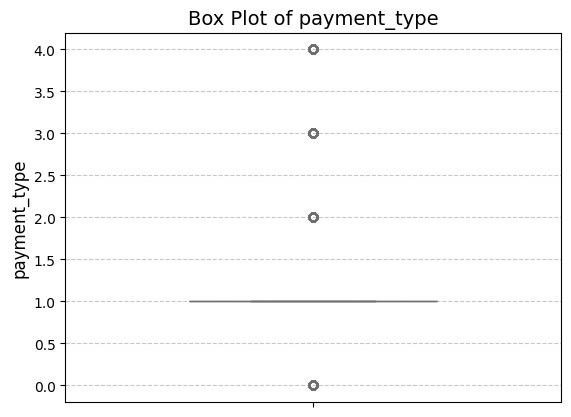

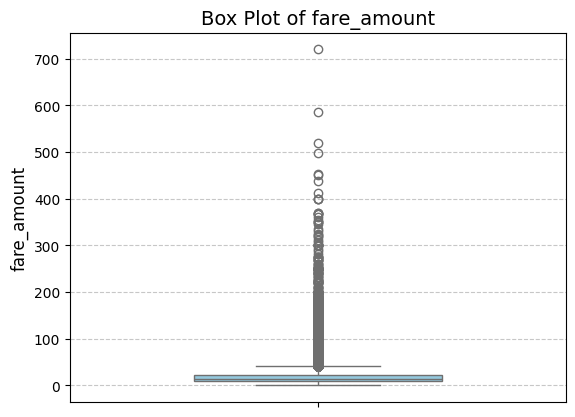

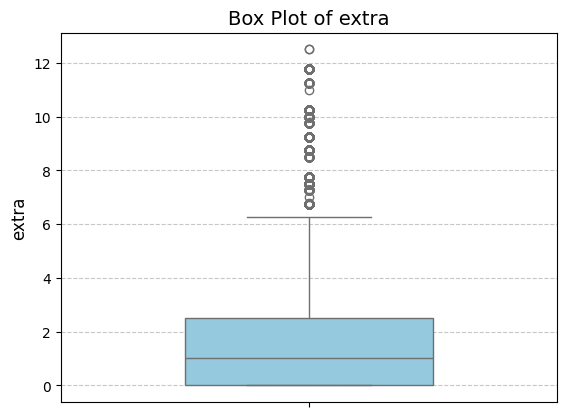

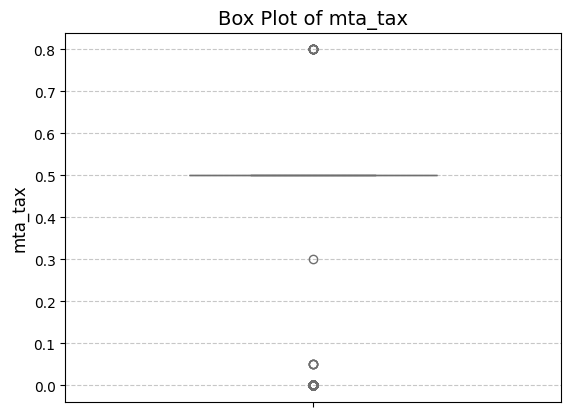

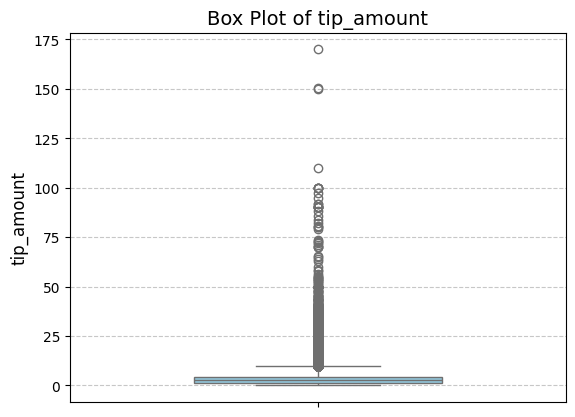

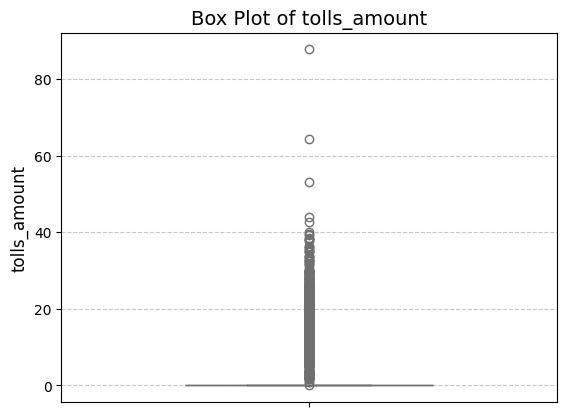

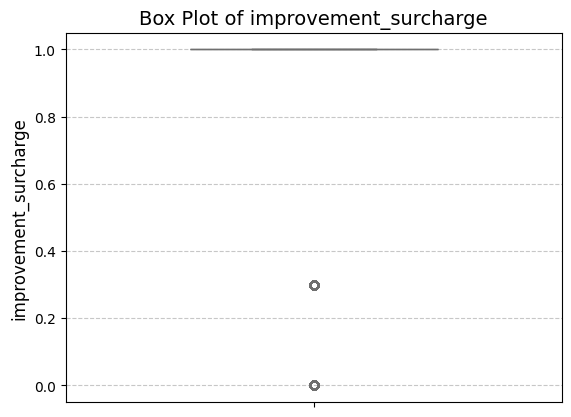

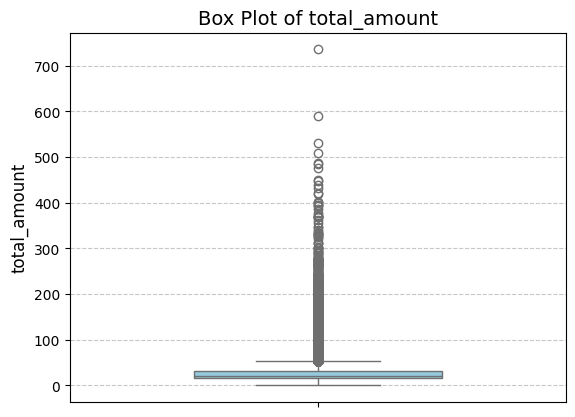

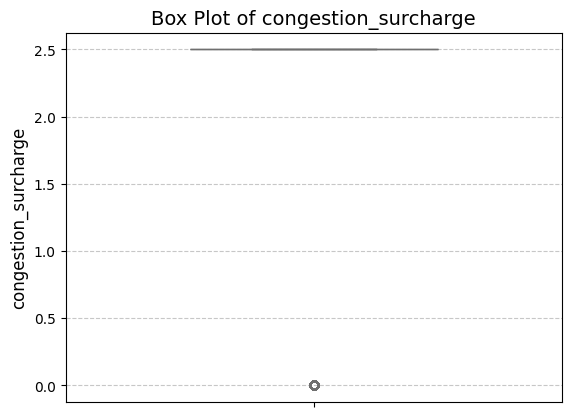

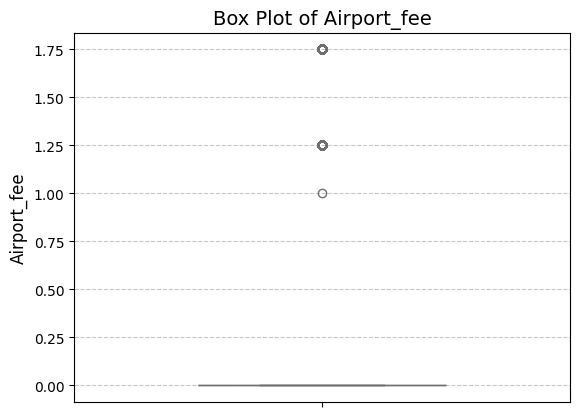

In [66]:
for col in numeric_cols:
    #plt.figure(figsize=(8, 6))  
    sns.boxplot(y=df[col], color='skyblue', width=0.5)  # Seaborn boxplot
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
    plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [70]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print("After removing passenger_count > 6:", df.shape)

After removing passenger_count > 6: (299995, 19)


In [71]:
# Continue with outlier handling
#Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] > 300))]

# Entries where trip_distance and fare_amount are 0 but pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# Entries where `trip_distance` is more than 250  miles.
df = df[df['trip_distance'] <= 250]

#Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)
df = df[df['payment_type'] != 0]
 

# Fix Other Outliers

# Capping Extremely High Fare Values (Above 99th Percentile)
fare_cap = df['fare_amount'].quantile(0.99)
df['fare_amount'] = df['fare_amount'].clip(upper=fare_cap)

# Replace Zero Passenger Count with Most Common Value 
df['passenger_count'].replace(0, df['passenger_count'].mode()[0], inplace=True)


In [72]:
df.head(10)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-03-15 22:27:39   2023-03-15 22:49:21              2.0   
1          2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2          1  2023-01-06 10:40:06   2023-01-06 11:27:30              1.0   
3          2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
4          2  2023-06-08 19:18:44   2023-06-08 19:27:16              2.0   
5          2  2023-05-13 19:07:34   2023-05-13 20:00:27              2.0   
6          2  2023-12-22 00:34:11   2023-12-22 00:48:28              1.0   
7          2  2023-10-04 16:50:57   2023-10-04 16:57:42              1.0   
8          2  2023-02-12 21:57:39   2023-02-12 22:03:32              1.0   
10         2  2023-01-01 06:37:34   2023-01-01 06:52:59              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            3.97         1.0                  N            48           262   
1            3.39         1.0                  N           231           230   
2            0.00         1.0                  N           138           230   
3            0.95         1.0                  N           246           186   
4            1.97         1.0                  N           143           238   
5           23.57         2.0                  N           132            13   
6            2.53         1.0                  N           140           143   
7            0.62         1.0                  N           249            68   
8            1.41         1.0                  N            50           143   
10          11.93         1.0                  N           132           138   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              1         21.9   1.00      0.5        2.69          0.00   
1              1         21.9   1.00      0.5        5.38          0.00   
2              1         35.9   8.75      0.5       11.85         13.10   
3              1          9.3   2.50      0.5        4.74          0.00   
4              1         12.1   2.50      0.5        1.00          0.00   
5              1         70.0   0.00      0.5       16.11          6.55   
6              1         15.6   1.00      0.5        4.12          0.00   
7              1          7.9   2.50      0.5        2.88          0.00   
8              2          8.6   1.00      0.5        0.00          0.00   
10             1         44.3   5.00      0.5        0.00          0.00   

    improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                     1.0         29.59                   2.5         0.00  
1                     1.0         32.28                   2.5         0.00  
2                     1.0         71.10                   2.5         1.25  
3                     1.0         20.54                   2.5         0.00  
4                     1.0         19.60                   2.5         0.00  
5                     1.0         96.66                   2.5         0.00  
6                     1.0         24.72                   2.5         0.00  
7                     1.0         17.28                   2.5         0.00  
8                     1.0         13.60                   2.5         0.00  
10                    1.0         52.05                   0.0         1.25

In [73]:
# Do any columns need standardising?

# Yes data has high variance (e.g., fare_amount, trip_distance can have huge differences
# We can apply Standardization after filtering, as it may lead to -ve value, Standardization before filtering will not be prefered

# Z-score Standardization (Mean = 0, Std Dev = 1)

#scaler = StandardScaler()
#df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'tolls_amount']] = scaler.fit_transform(
#    df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'tolls_amount']]
#)
#df.head()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [75]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [80]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['month'] = df['tpep_pickup_datetime'].dt.month

df_non_zero = df[
    (df['fare_amount'] > 0) & 
    (df['total_amount'] > 0) & 
    ~((df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']))
].copy()

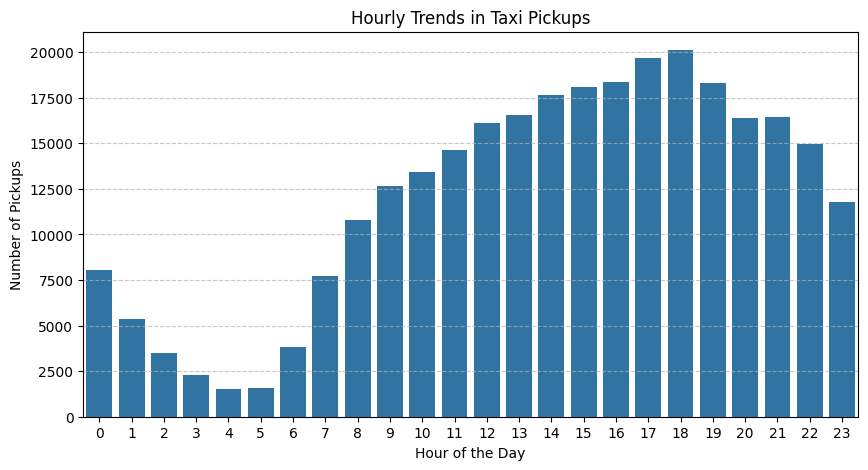

In [81]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(10,5))
sns.countplot(x=df['hour'])
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

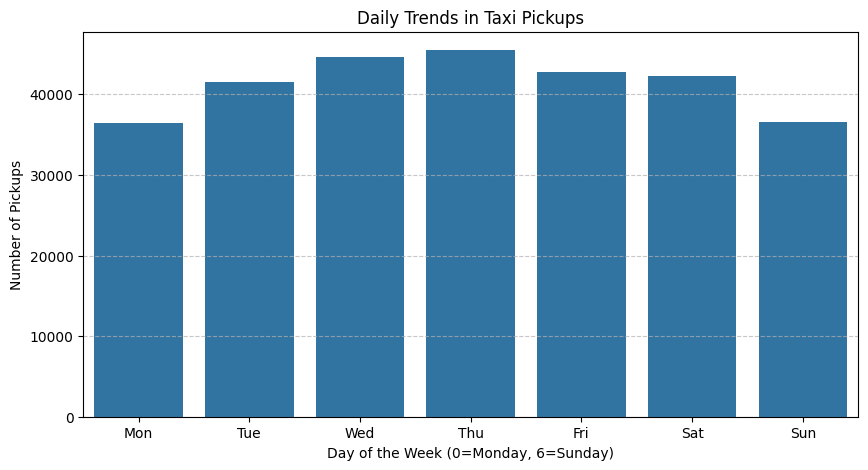

In [82]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize=(10,5))
sns.countplot(x=df['day_of_week'])
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(7), labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

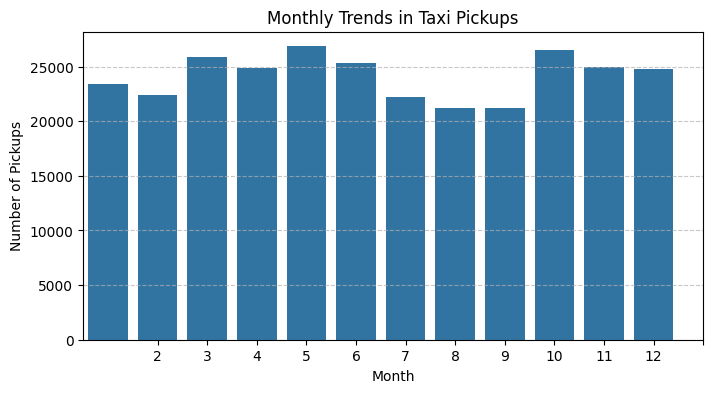

In [83]:
# Show the monthly trends in pickups
plt.figure(figsize=(8,4))
sns.countplot(x=df['month'])
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1,13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [86]:
# Analyse the above parameters
# Assuming df is the loaded DataFrame
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero and negative values
zero_counts = (df[financial_columns] == 0).sum()
negative_counts = (df[financial_columns] < 0).sum()

print("Zero Value Counts:\n", zero_counts)
print("\n Negative Value Counts:\n", negative_counts)

Zero Value Counts:
 fare_amount         79
tip_amount       65009
total_amount        44
trip_distance     3637
dtype: int64

 Negative Value Counts:
 fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In my opinion:
Yes:
* It is beneficial to create a copy DataFrame leaving out the zero values from these columns.
* However, zero value in `tip_amount` seems natural as there can be many scenarios where customer paid zero tip as it is optional. Hence, not removed rows with zero values of `tip_amount`
* The number of zero/negative values is small.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?
* Ans : No. These cases are valid rides. There can be small rides where user have pick-up and drop-off in same zone.

In [89]:
# Create a df with non zero entries for the selected parameters.

# Columns to check for zero values
financial_columns = ["fare_amount", "total_amount", "trip_distance"]
# Count the number of zero entries
zero_counts = (df[financial_columns] == 0).sum()
# Keep records where trip_distance is zero only if pickup and dropoff locations are the same
df_nonzero = df[
    (df["fare_amount"] > 0) &
    (df["total_amount"] > 0) &
    ((df["trip_distance"] > 0) | (df["PULocationID"] == df["DOLocationID"]))
].copy()

print(f"Original size: {df.shape[0]}, Filtered size: {df_nonzero.shape[0]}")

Original size: 289671, Filtered size: 288380


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

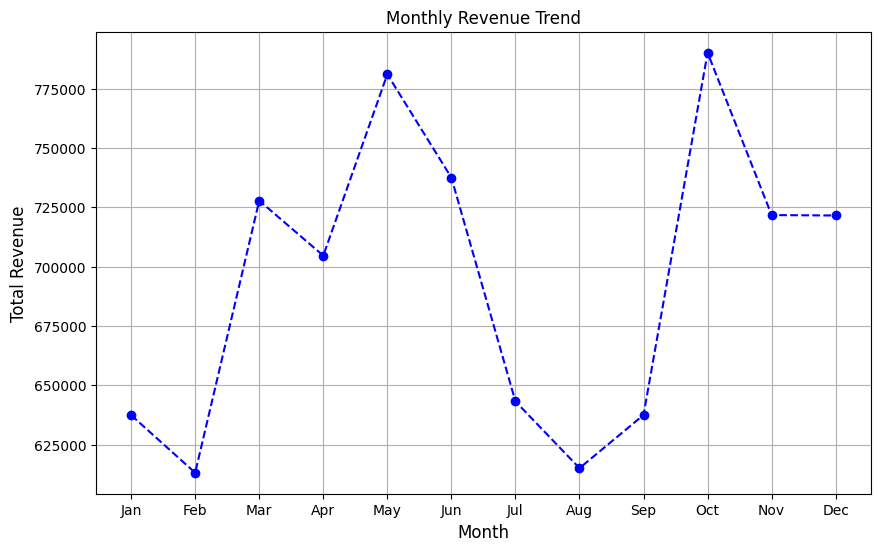

In [91]:
# Group data by month and analyse monthly revenue

monthly_revenue = df_non_zero.groupby('month')['total_amount'].sum().reset_index()


# Plotting the monthly revenue trend
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue['month'], monthly_revenue['total_amount'],  marker='o', linestyle='--', color='blue')
plt.title('Monthly Revenue Trend', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(monthly_revenue['month'])
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

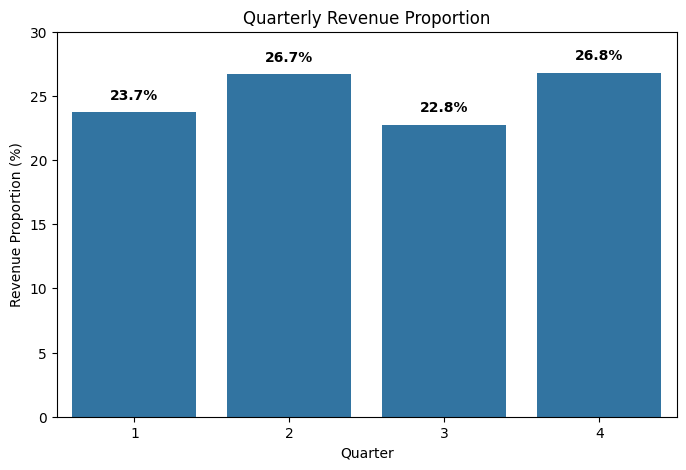

   quarter  total_amount  Revenue_Proportion
0        1    1978366.37           23.747275
1        2    2223290.04           26.687211
2        3    1895737.22           22.755438
3        4    2233525.93           26.810077


In [93]:
# Calculate proportion of each quarter

df_non_zero['quarter'] = df_non_zero['tpep_pickup_datetime'].dt.quarter

quarterly_revenue = df_non_zero.groupby('quarter')['total_amount'].sum().reset_index()

total_revenue = quarterly_revenue['total_amount'].sum()

quarterly_revenue['Revenue_Proportion'] = (quarterly_revenue['total_amount'] / total_revenue) * 100

# Bar chart for quarterly revenue proportion
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=quarterly_revenue, 
    x='quarter', 
    y='Revenue_Proportion')

# Displaying values on bars correctly
for bar, value in zip(ax.patches, quarterly_revenue['Revenue_Proportion']):
    x = bar.get_x() + bar.get_width() / 2  # Correct x-position
    y = bar.get_height() + 1  # Slightly above the bar
    ax.text(x, y, f"{value:.1f}%", ha='center', fontsize=10, fontweight='bold')

plt.xlabel("Quarter")
plt.ylabel("Revenue Proportion (%)")
plt.title("Quarterly Revenue Proportion")
plt.ylim(0, 30)

plt.show()

print(quarterly_revenue)



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

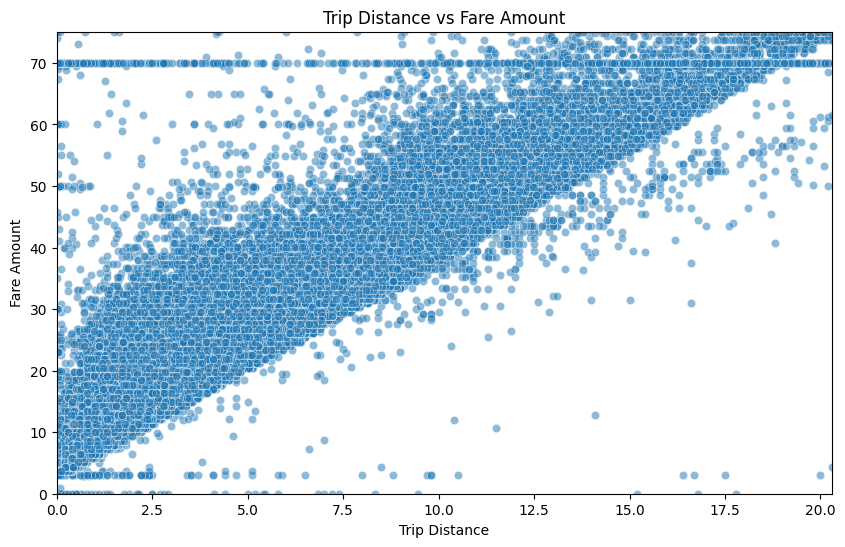

Correlation between Trip Distance and Fare Amount: 0.94


In [95]:
# Show how trip fare is affected by distance

# Filter out trips where trip_distance is 0
df_filtered = df[df['trip_distance'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['trip_distance'], y=df_filtered['fare_amount'], alpha=0.5)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance vs Fare Amount')
plt.ylim(0, df_filtered['fare_amount'].quantile(0.99))
plt.xlim(0, df_filtered['trip_distance'].quantile(0.99))
plt.show()


# Compute the correlation coefficient
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

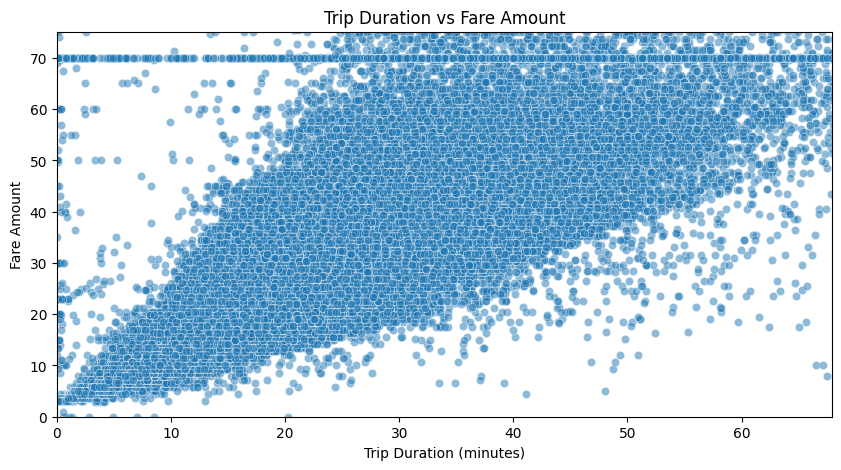

Correlation between Fare Amount and Trip Duration: 0.29


In [97]:
# Show relationship between fare and trip duration

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Compute trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
# Filter out invalid data
df_filtered = df[(df['trip_duration'] > 0) & (df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filtered['trip_duration'], y=df_filtered['fare_amount'], alpha=0.5)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount")
plt.title("Trip Duration vs Fare Amount")
plt.ylim(0, df_filtered['fare_amount'].quantile(0.99)) 
plt.xlim(0, df_filtered['trip_duration'].quantile(0.99)) 
plt.show()

correlation_duration = df_filtered['fare_amount'].corr(df_filtered['trip_duration'])
print(f"Correlation between Fare Amount and Trip Duration: {correlation_duration:.2f}")


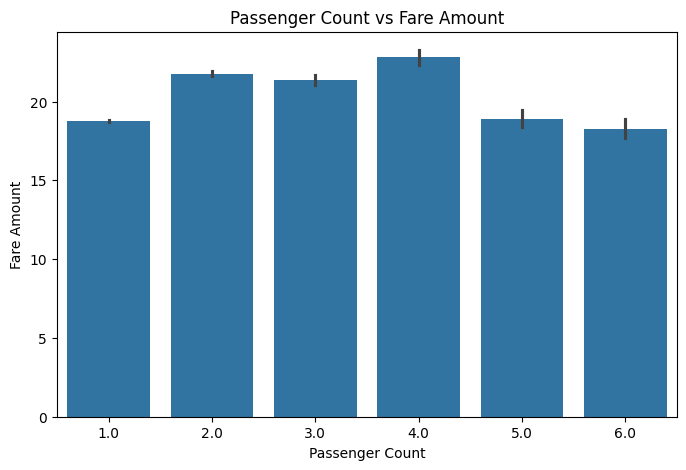

Correlation between Fare Amount and Passenger Count: 0.04


In [98]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 5))
sns.barplot(x=df_filtered['passenger_count'], y=df_filtered['fare_amount'],estimator=np.mean)
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.title("Passenger Count vs Fare Amount")
plt.show()

correlation_passengers = df_filtered['fare_amount'].corr(df_filtered['passenger_count'])
print(f"Correlation between Fare Amount and Passenger Count: {correlation_passengers:.2f}")



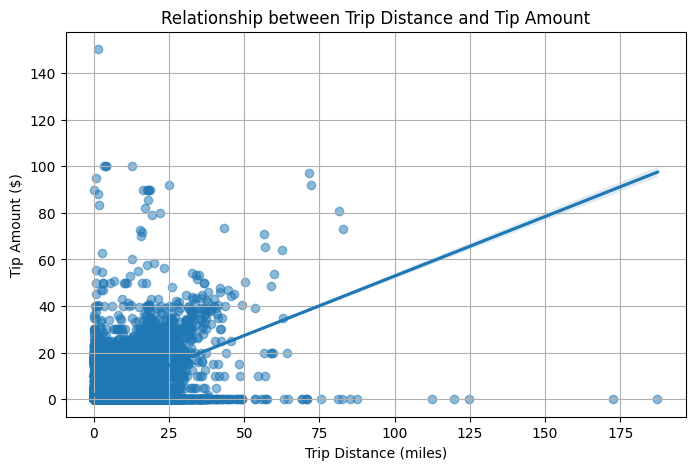

Correlation between Tip Amount and Trip Distance: 0.59


In [99]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8,5))
sns.regplot(x='trip_distance', y='tip_amount', data=df_filtered, scatter_kws={'alpha':0.5})
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Relationship between Trip Distance and Tip Amount')
plt.grid(True)

plt.show()


correlation_tip_distance = df_filtered['tip_amount'].corr(df_filtered['trip_distance'])
print(f"Correlation between Tip Amount and Trip Distance: {correlation_tip_distance:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

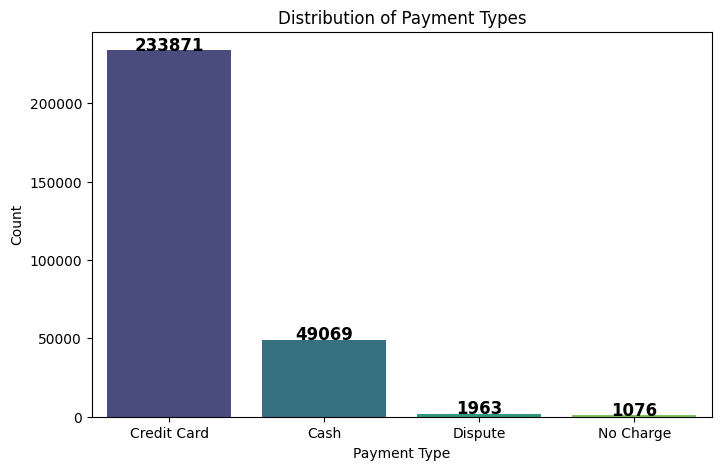

In [111]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = df_filtered['payment_type'].value_counts()


payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

payment_labels_ordered = [payment_labels[p] for p in payment_counts.index]

# Apply labels to index
payment_counts.index = payment_counts.index.map(payment_labels)

# Ploting the bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=payment_labels_ordered, y=payment_counts.values, palette='viridis')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=0)
for i, value in enumerate(payment_counts.values):
    ax.text(i, value + 50, str(value), ha='center', fontsize=12, fontweight='bold')

plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [117]:
# pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [120]:
# import geopandas as gpd
import geopandas as gpd



# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

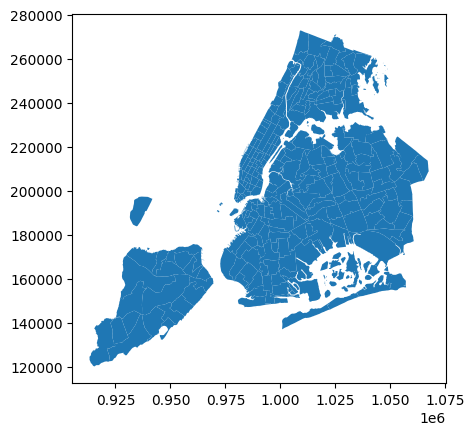

In [123]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [127]:
# Merge zones and trip records using locationID and PULocationID
df_merged = df_filtered.merge(
    zones, left_on="PULocationID", right_on="LocationID", how="left", suffixes=("", "_pickup")
)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286000 entries, 0 to 285999
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               286000 non-null  int64         
 1   tpep_pickup_datetime   286000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  286000 non-null  datetime64[ns]
 3   passenger_count        286000 non-null  float64       
 4   trip_distance          286000 non-null  float64       
 5   RatecodeID             286000 non-null  float64       
 6   store_and_fwd_flag     286000 non-null  object        
 7   PULocationID           286000 non-null  int64         
 8   DOLocationID           286000 non-null  int64         
 9   payment_type           286000 non-null  int64         
 10  fare_amount            286000 non-null  float64       
 11  extra                  286000 non-null  float64       
 12  mta_tax                286000 non-null  floa

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [130]:
# Group data by location and calculate the number of trips
trips_per_location = df_merged.groupby("PULocationID").size().reset_index(name="total_trips")
trips_per_location = trips_per_location.sort_values(by="total_trips", ascending=False)

trips_per_location.head(10)


PULocationID  total_trips
113           132        15041
209           237        13552
141           161        13529
208           236        12113
142           162        10218
119           138        10210
162           186        10018
123           142         9651
202           230         9612
143           163         8527

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [133]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left")

zones["total_trips"] = zones["total_trips"].fillna(0)

zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  total_trips  
0           1.0          9.0  
1           2.0          1.0  
2           3.0          7.0  
3           4.0        284.0  
4           NaN          0.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

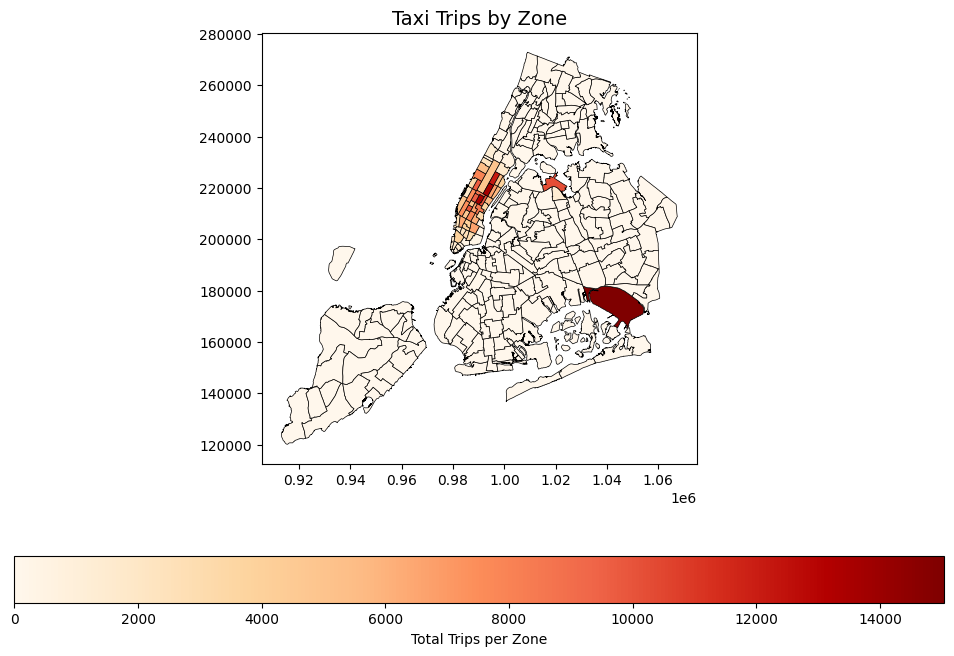

In [138]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the map and display it
zones.plot(
    column="total_trips",  
    cmap="OrRd", 
    linewidth=0.5,
    edgecolor="black",
    ax=ax,
    legend=True,
    legend_kwds={"label": "Total Trips per Zone", "orientation": "horizontal"},
)
# Set title
ax.set_title("Taxi Trips by Zone", fontsize=14)

# Show the plot
plt.show()


In [139]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by="total_trips", ascending=False)

# Display the top rows
zones_sorted.head(10)

OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
141       142    0.038176    0.000076           Lincoln Square East   
229       230    0.031028    0.000056     Times Sq/Theatre District   
162       163    0.034177    0.000041                 Midtown North   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
162         163  Manhattan  POLYGON ((989412.663 219020.943, 990045.841 21...   

     PULocationID  total_trips  
131         132.0      15041.0  
236         237.0      13552.0  
160         161.0      13529.0  
235         236.0      12113.0  
161         162.0      10218.0  
137         138.0      10210.0  
185         186.0      10018.0  
141         142.0       9651.0  
229         230.0       9612.0  
162         163.0       8527.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

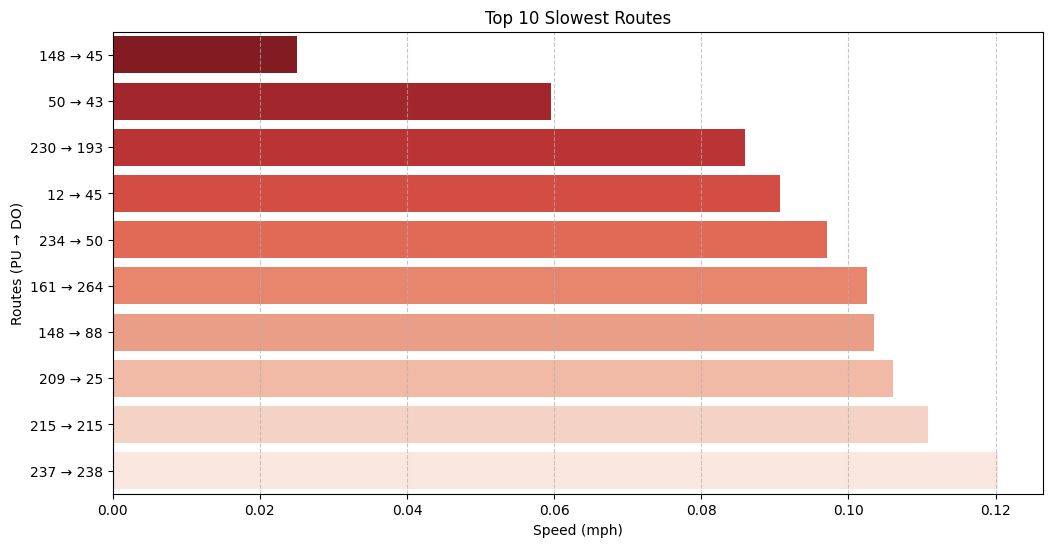

In [150]:
# Find routes which have the slowest speeds at different times of the day
df_filtered["trip_duration"] = (df_filtered["tpep_dropoff_datetime"] - df_filtered["tpep_pickup_datetime"]).dt.total_seconds()/ 60
df_filtered = df_filtered[df_filtered["trip_duration"] > 0]

route_stats = df_filtered.groupby(["PULocationID", "DOLocationID", "hour"]).agg(
    avg_trip_duration=("trip_duration", "mean"), 
    total_distance=("trip_distance", "sum")
).reset_index()

# Calculating speed in miles per hour
route_stats["speed_mph"] = (route_stats["total_distance"] / route_stats["avg_trip_duration"]) * 60
slow_routes = route_stats.sort_values(by="speed_mph", ascending=True)
slowest_10 = slow_routes.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=slowest_10, x="speed_mph", y=slowest_10["PULocationID"].astype(str) + " → " + slowest_10["DOLocationID"].astype(str), palette="Reds_r")

plt.xlabel("Speed (mph)")
plt.ylabel("Routes (PU → DO)")
plt.title("Top 10 Slowest Routes")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


How does identifying high-traffic, high-demand routes help us?

Identifying high-traffic, high-demand routes is crucial for improving operational efficiency, pricing strategies, and customer experience:
1. Operational Efficiency
    * Allocate taxis efficiently to high-demand areas, reducing passenger wait times.
    * Prevent idle taxis in low-demand zones.
    * Identify slow routes due to congestion.
    * Adjust routes dynamically to avoid delays.
    * Help drivers target peak routes and maximize earnings.
    * Reduce empty trips by positioning cabs where demand is high.
2. Pricing Strategies
    * Increase fares during peak demand hours to match supply with demand.
    * Prevent price undercutting in high-demand areas.
    * Offer discounts or promotions in low-demand zones to attract riders.
    * Adjust base fares for long or frequently traveled routes.
3. Customer Experience & Retention
    * More taxis available in high-demand areas = faster pickups.
    * Reduces customer frustration and boosts loyalty.
    * Reroute around congestion for smoother rides.
    * Improve ETAs (Estimated Time of Arrival) accuracy.
    * Identify zones where demand exists but supply is low.
    * Expand fleet availability to capture untapped customers.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

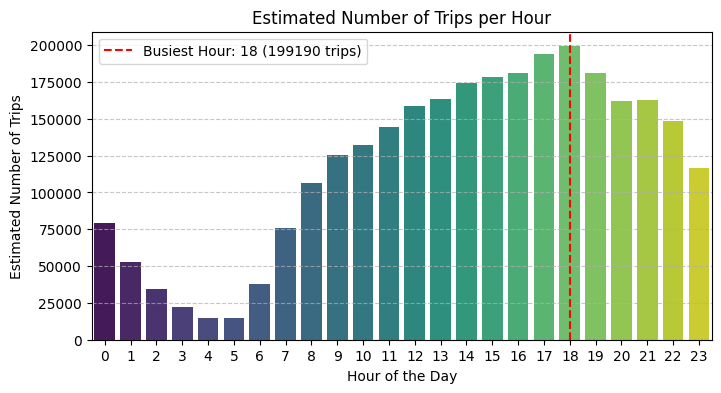

In [154]:
# Visualise the number of trips per hour and find the busiest hour
sampling_ratio = 0.1  

# Group by 'hour' and count trips, then scale up
trips_per_hour_sampled = df_filtered.groupby('hour').size()
trips_per_hour_actual = trips_per_hour_sampled / sampling_ratio

# Find the busiest hour
busiest_hour = trips_per_hour_actual.idxmax()
busiest_hour_count = int(trips_per_hour_actual.max())  # Convert to integer for readability

# Plot the number of trips per hour
plt.figure(figsize=(8, 4))
sns.barplot(x=trips_per_hour_actual.index, y=trips_per_hour_actual.values, palette="viridis")

plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Number of Trips")
plt.title("Estimated Number of Trips per Hour")
plt.xticks(range(24))  # Ensure all hours are labeled
plt.grid(axis="y", linestyle="--", alpha=0.7)


# Highlight the busiest hour
plt.axvline(x=busiest_hour, color="red", linestyle="--", label=f"Busiest Hour: {busiest_hour} ({busiest_hour_count} trips)")
plt.legend()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [158]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the number
sample_fraction = 0.05

# Group trips by hour and count them
hourly_trips = df_filtered.groupby('hour').size().reset_index(name='trip_count')

# Scale up the trip counts using the sample fraction
hourly_trips['actual_trip_count'] = hourly_trips['trip_count'] / sample_fraction

# Sort by the actual trip count in descending order and select the top 5 busiest hours
top5_hours = hourly_trips.sort_values('actual_trip_count', ascending=False).head(5)

print("Top 5 Busiest Hours (Scaled to Actual Trip Counts):")
print(top5_hours[['hour', 'actual_trip_count']])

Top 5 Busiest Hours (Scaled to Actual Trip Counts):
    hour  actual_trip_count
18    18           398380.0
17    17           388360.0
19    19           362100.0
16    16           361840.0
15    15           356160.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

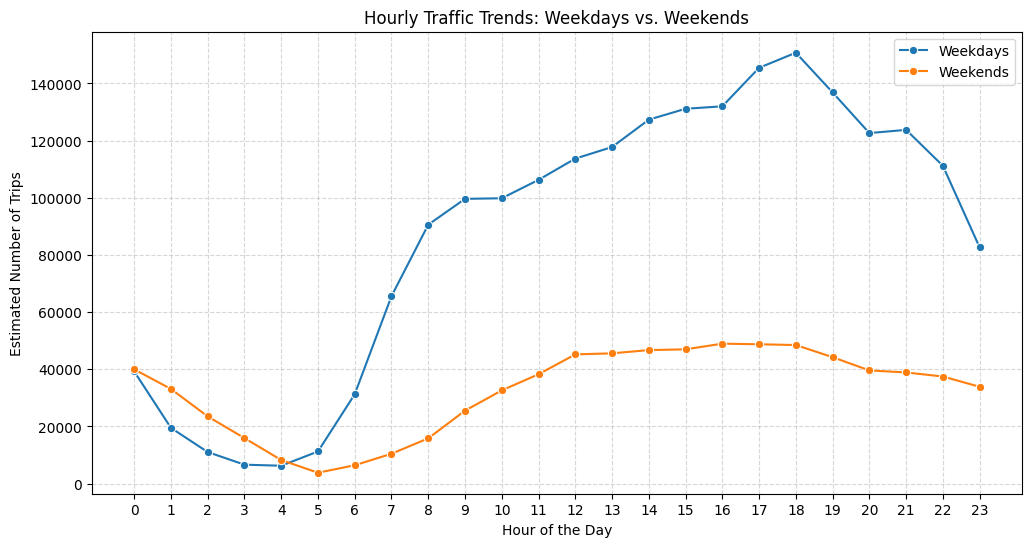

In [161]:
# Compare traffic trends for the week days and weekends
sample_fraction = 0.1

# Convert pickup datetime to weekday (0 = Monday, 6 = Sunday)
df_filtered["pickup_datetime"] = pd.to_datetime(df_filtered["tpep_pickup_datetime"])  
df_filtered["day_of_week"] = df_filtered["pickup_datetime"].dt.dayofweek  # Monday=0, Sunday=6
df_filtered["hour"] = df_filtered["pickup_datetime"].dt.hour  # Extract hour

# Create a 'weekend' flag (1 for weekend, 0 for weekday)
df_filtered["is_weekend"] = df_filtered["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)
# Group by 'hour' and 'is_weekend', count trips
trips_by_hour = df_filtered.groupby(["hour", "is_weekend"]).size().unstack()
# Scale up the numbers to account for sampling
trips_by_hour_actual = trips_by_hour / sample_fraction  

# Plot the hourly trends
plt.figure(figsize=(12, 6))

sns.lineplot(x=trips_by_hour_actual.index, y=trips_by_hour_actual[0], label="Weekdays", marker="o")
sns.lineplot(x=trips_by_hour_actual.index, y=trips_by_hour_actual[1], label="Weekends", marker="o")

plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Number of Trips")
plt.title("Hourly Traffic Trends: Weekdays vs. Weekends")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us? <br><br>
<b>Weekend patterns are nearly flat for the day and evening. However, weekdays see huge surge in traffic during day and evening times. This might be due to office hours on weekdays, people tends to take taxis more often.<b>

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

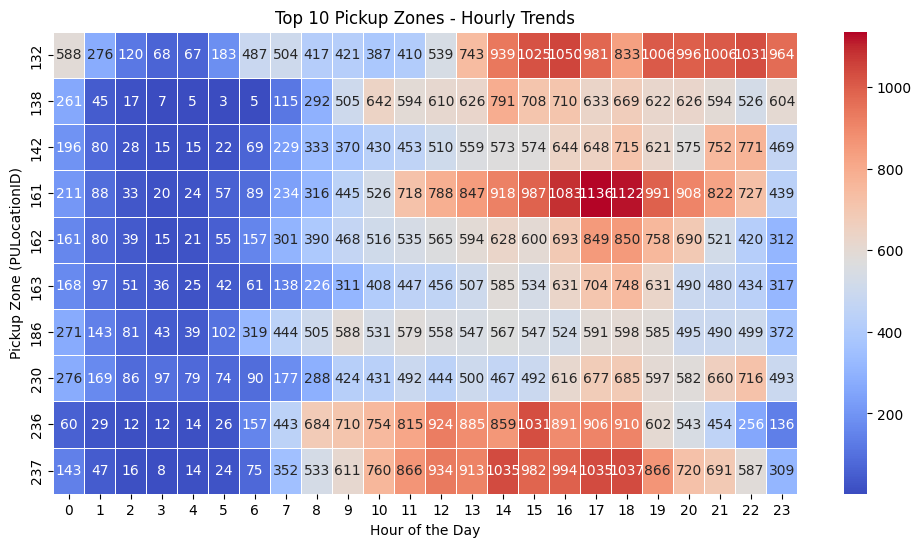

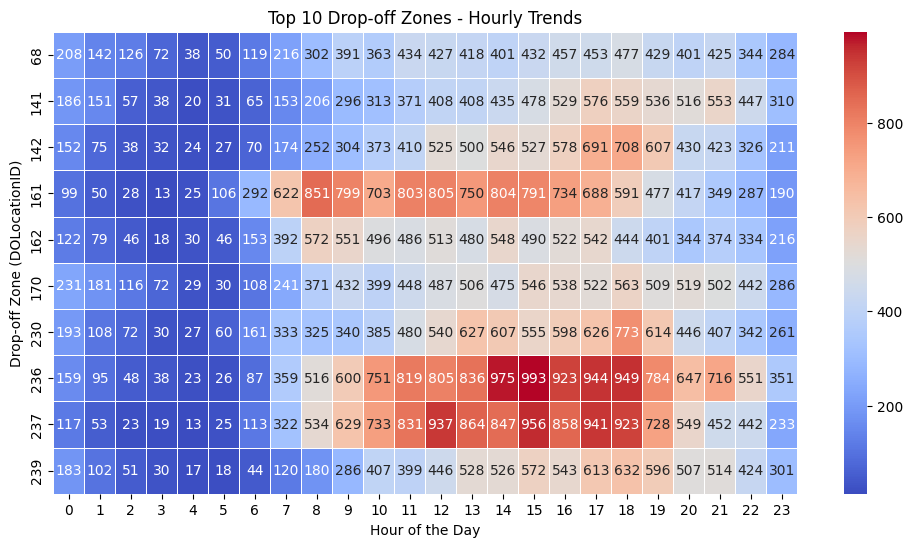

<Figure size 2400x600 with 0 Axes>

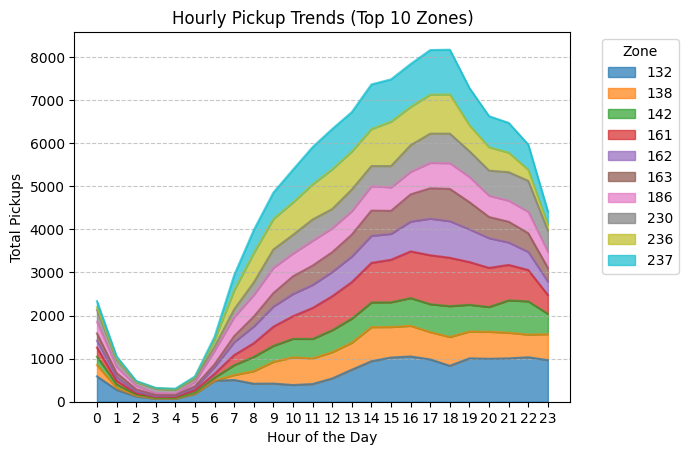

<Figure size 2400x600 with 0 Axes>

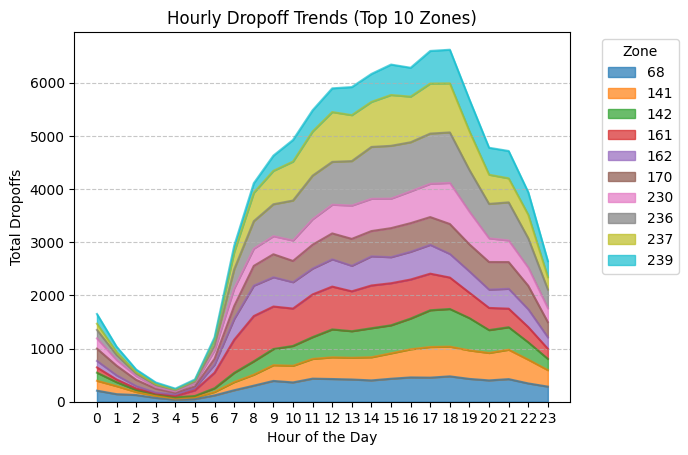

In [165]:
# Find top 10 pickup and dropoff zones
pickup_counts = df_filtered.groupby(["PULocationID", "hour"]).size().reset_index(name="trip_count")
top_10_pickup_zones = pickup_counts.groupby("PULocationID")["trip_count"].sum().nlargest(10).index
top_pickup_data = pickup_counts[pickup_counts["PULocationID"].isin(top_10_pickup_zones)]
dropoff_counts = df_filtered.groupby(["DOLocationID", "hour"]).size().reset_index(name="trip_count")
top_10_dropoff_zones = dropoff_counts.groupby("DOLocationID")["trip_count"].sum().nlargest(10).index
top_dropoff_data = dropoff_counts[dropoff_counts["DOLocationID"].isin(top_10_dropoff_zones)]

# Heatmap for pick-ups
pickup_heatmap_data = top_pickup_data.pivot(index="PULocationID", columns="hour", values="trip_count")
plt.figure(figsize=(12, 6))
sns.heatmap(pickup_heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("Hour of the Day")
plt.ylabel("Pickup Zone (PULocationID)")
plt.title("Top 10 Pickup Zones - Hourly Trends")
plt.show()

# Heatmap for drop-offs
dropoff_heatmap_data = top_dropoff_data.pivot(index="DOLocationID", columns="hour", values="trip_count")
plt.figure(figsize=(12, 6))
sns.heatmap(dropoff_heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("Hour of the Day")
plt.ylabel("Drop-off Zone (DOLocationID)")
plt.title("Top 10 Drop-off Zones - Hourly Trends")
plt.show()

# Stacked area chart
plt.figure(figsize=(24, 6))
top_pickup_pivot = top_pickup_data.pivot(index="hour", columns="PULocationID", values="trip_count")
top_pickup_pivot.plot(kind="area", stacked=True, colormap="tab10", alpha=0.7)

plt.xlabel("Hour of the Day")
plt.ylabel("Total Pickups")
plt.title("Hourly Pickup Trends (Top 10 Zones)")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Zone", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Stacked area chart
plt.figure(figsize=(24, 6))
top_dropoff_pivot = top_dropoff_data.pivot(index="hour", columns="DOLocationID", values="trip_count")
top_dropoff_pivot.plot(kind="area", stacked=True, colormap="tab10", alpha=0.7)

plt.xlabel("Hour of the Day")
plt.ylabel("Total Dropoffs")
plt.title("Hourly Dropoff Trends (Top 10 Zones)")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Zone", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

Top 10 Zones with Highest Pickup/Drop-off Ratio:
     pickup_count  dropoff_count  pickup_drop_ratio
2             1.0            0.0                inf
70         1333.0          137.0           9.729927
132       15041.0         3104.0           4.845683
138       10210.0         3474.0           2.938975
186       10018.0         6270.0           1.597767
114        3762.0         2734.0           1.376006
43         4886.0         3554.0           1.374789
249        6301.0         4878.0           1.291718
162       10218.0         8199.0           1.246250
142        9651.0         8003.0           1.205923

Bottom 10 Zones with Lowest Pickup/Drop-off Ratio:
     pickup_count  dropoff_count  pickup_drop_ratio
5             0.0            3.0                0.0
27            0.0            3.0                0.0
30            0.0            3.0                0.0
57            0.0            3.0                0.0
58            0.0            5.0                0.0
59            0

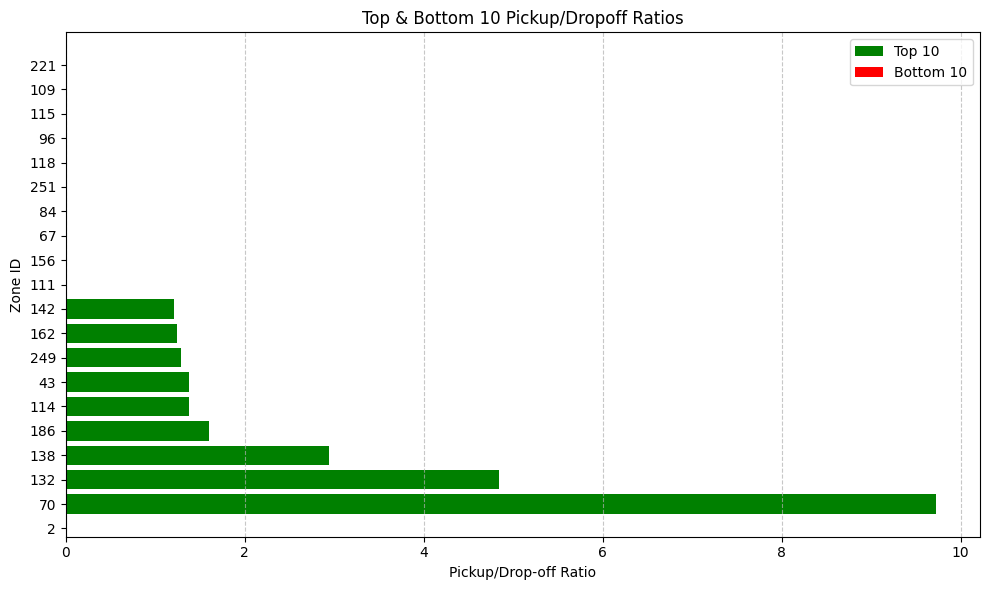

In [167]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df_filtered["PULocationID"].value_counts().rename("pickup_count")
dropoff_counts = df_filtered["DOLocationID"].value_counts().rename("dropoff_count")

# Merging pickup and dropoff into a single DataFrame
zone_ratios = pd.DataFrame({"pickup_count": pickup_counts, "dropoff_count": dropoff_counts}).fillna(0)
zone_ratios["pickup_drop_ratio"] = zone_ratios["pickup_count"] / (zone_ratios["dropoff_count"])

top_10_zones = zone_ratios.nlargest(10, "pickup_drop_ratio")
bottom_10_zones = zone_ratios.nsmallest(10, "pickup_drop_ratio")


print("Top 10 Zones with Highest Pickup/Drop-off Ratio:")
print(top_10_zones)

print("\nBottom 10 Zones with Lowest Pickup/Drop-off Ratio:")
print(bottom_10_zones)

# Plotting top 10 and bottom 10 pickup/dropoff ratios
plt.figure(figsize=(10, 6))
zone_ratios_sorted = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=False)

plt.barh(zone_ratios_sorted.index.astype(str)[:10], zone_ratios_sorted["pickup_drop_ratio"][:10], color="green", label="Top 10")
plt.barh(zone_ratios_sorted.index.astype(str)[-10:], zone_ratios_sorted["pickup_drop_ratio"][-10:], color="red", label="Bottom 10")

plt.xlabel("Pickup/Drop-off Ratio")
plt.ylabel("Zone ID")
plt.title("Top & Bottom 10 Pickup/Dropoff Ratios")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

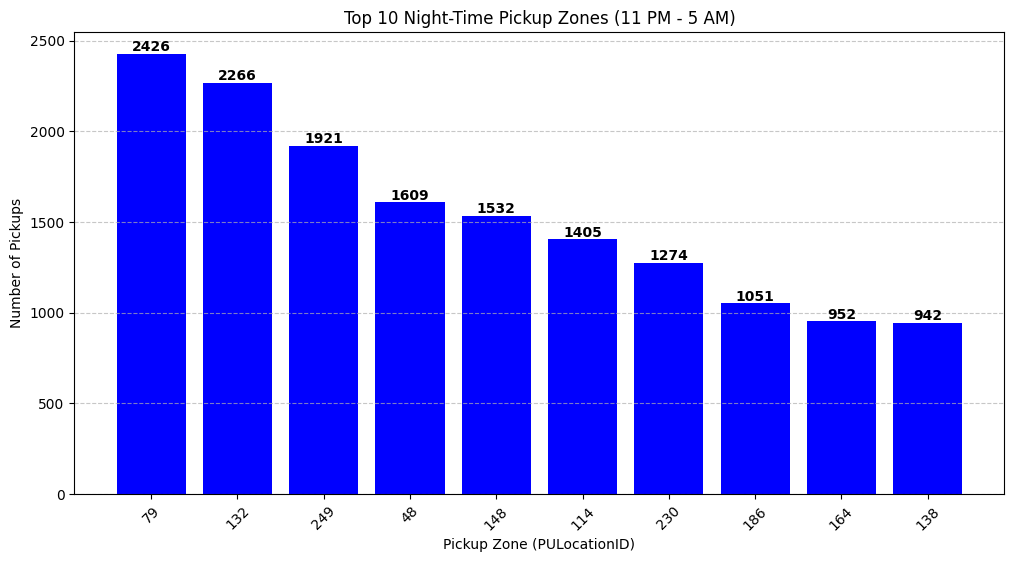

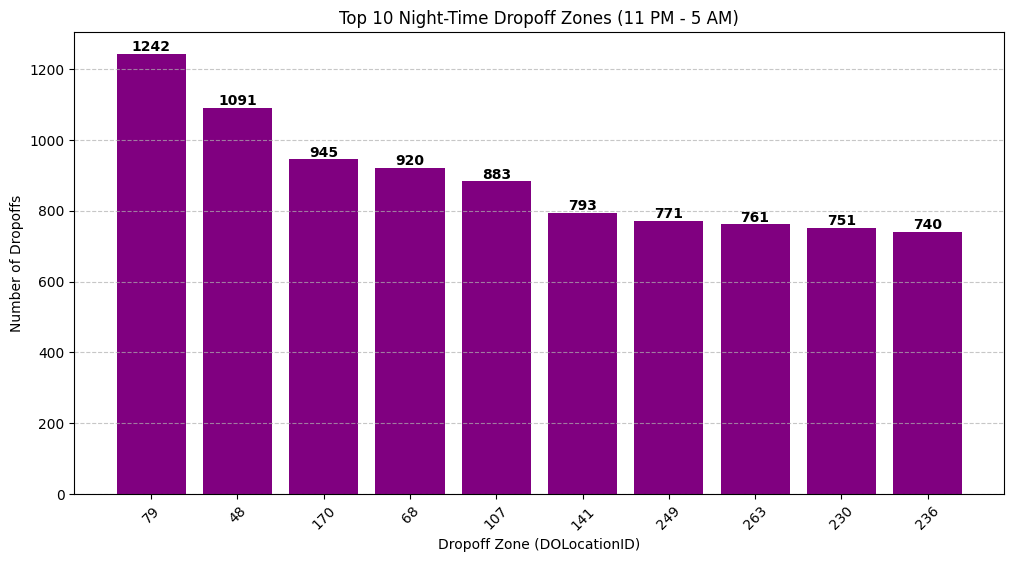

In [169]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23, 0, 1, 2, 3, 4, 5]
df_night = df_filtered[df_filtered["hour"].isin(night_hours)]

night_pickup_counts = df_night["PULocationID"].value_counts().rename("pickup_count")
night_dropoff_counts = df_night["DOLocationID"].value_counts().rename("dropoff_count")

top_10_night_pickups = night_pickup_counts.nlargest(10)
top_10_night_dropoffs = night_dropoff_counts.nlargest(10)

# Top 10 Night Pickup Zones
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_night_pickups.index.astype(str), top_10_night_pickups.values, color="blue")
plt.xlabel("Pickup Zone (PULocationID)")
plt.ylabel("Number of Pickups")
plt.title("Top 10 Night-Time Pickup Zones (11 PM - 5 AM)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

# Top 10 Night Dropoff Zones
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_night_dropoffs.index.astype(str), top_10_night_dropoffs.values, color="purple")
plt.xlabel("Dropoff Zone (DOLocationID)")
plt.ylabel("Number of Dropoffs")
plt.title("Top 10 Night-Time Dropoff Zones (11 PM - 5 AM)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Nighttime Revenue Share: 11.97%
Daytime Revenue Share:   88.03%


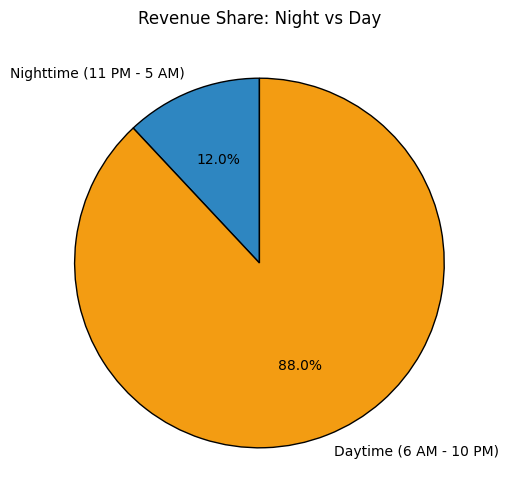

In [173]:
# Filter for night hours (11 PM to 5 AM)
# Filter for night hours (11 PM to 5 AM)
df_night = df_non_zero[(df_non_zero['hour'] >= 23) | (df_non_zero['hour'] <= 5)].copy()
night_revenue = df_night['total_amount'].sum()

# Filter for daytime hours (6 AM to 10 PM)
df_day = df_non_zero[(df_non_zero['hour'] > 5) & (df_non_zero['hour'] < 23)].copy()
day_revenue = df_day['total_amount'].sum()

# Calculate total revenue
total_revenue = df_non_zero['total_amount'].sum()

# Calculate revenue share percentages
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {night_share:.2f}%")
print(f"Daytime Revenue Share:   {day_share:.2f}%")

labels = ['Nighttime (11 PM - 5 AM)', 'Daytime (6 AM - 10 PM)']
values = [night_share, day_share]

# Set a color palette
colors = ['#2E86C1', '#F39C12']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Revenue Share: Night vs Day')
plt.show()



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

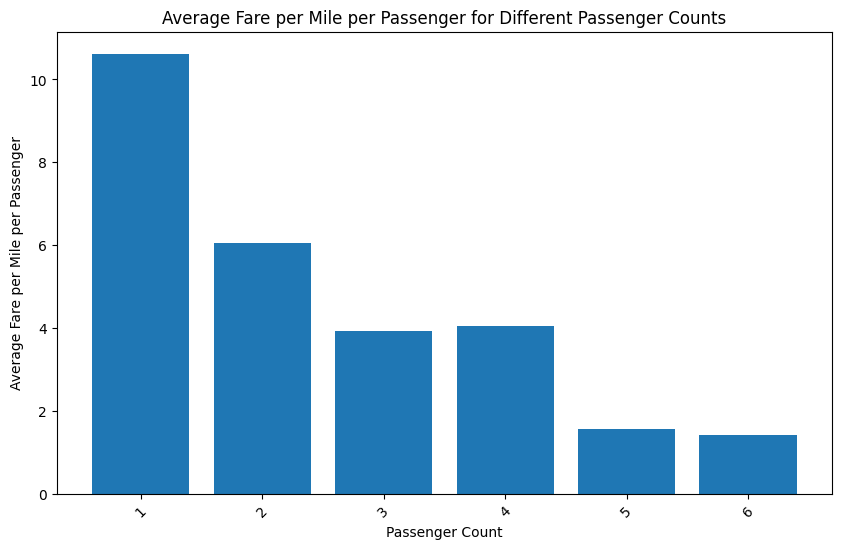

In [178]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out trips with zero or negative distance
df_non_zero = df_non_zero[df_non_zero['trip_distance'] > 0]

# Calculate fare per mile
df_non_zero['fare_per_mile'] = df_non_zero['fare_amount'] / df_non_zero['trip_distance']

# Calculate fare per mile per passenger
df_non_zero['fare_per_mile_per_passenger'] =  (df_non_zero["fare_amount"] / (df_non_zero["trip_distance"] * df_non_zero["passenger_count"]))

# Group by passenger count and calculate the average fare per mile per passenger
avg_fare_per_passenger = df_non_zero.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_fare_per_passenger['passenger_count'], avg_fare_per_passenger['fare_per_mile_per_passenger'])
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger')
plt.title('Average Fare per Mile per Passenger for Different Passenger Counts')
plt.xticks(avg_fare_per_passenger['passenger_count'], rotation=45)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

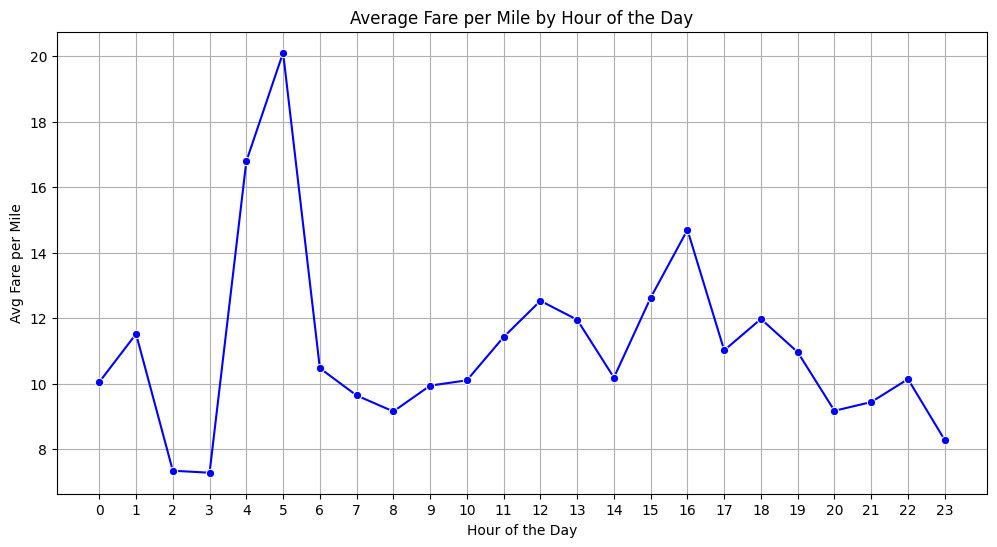

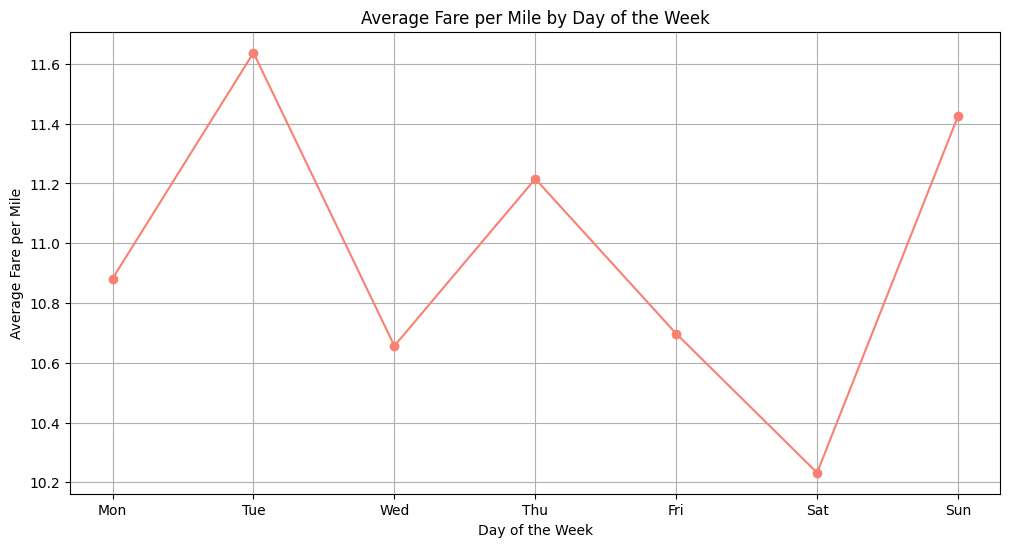

In [181]:
# Compare the average fare per mile for different days and for different times of the day

# Extract hour and day of week from the pickup datetime
df_non_zero['hour'] =df_non_zero['tpep_pickup_datetime'].dt.hour
df_non_zero['day_of_week'] =df_non_zero['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, ..., 6 = Sunday

# Filter out trips with zero or negative distance
df_non_zero =df_non_zero[df_non_zero['trip_distance'] > 0]

# Calculate fare per mile
df_non_zero['fare_per_mile'] =df_non_zero['fare_amount'] /df_non_zero['trip_distance']

# Group by hour and calculate the average fare per mile
avg_fare_per_mile_hour = df_non_zero.groupby('hour')['fare_per_mile'].mean().reset_index()

# Group by day of week and calculate the average fare per mile
avg_fare_per_mile_day = df_non_zero.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Visualizing the Average Fare per Mile by Hour of the Day

plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="fare_per_mile", data=avg_fare_per_mile_hour, marker="o", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(avg_fare_per_mile_day['day_of_week'], avg_fare_per_mile_day['fare_per_mile'], marker='o', color='salmon', label='Average Fare per Mile')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

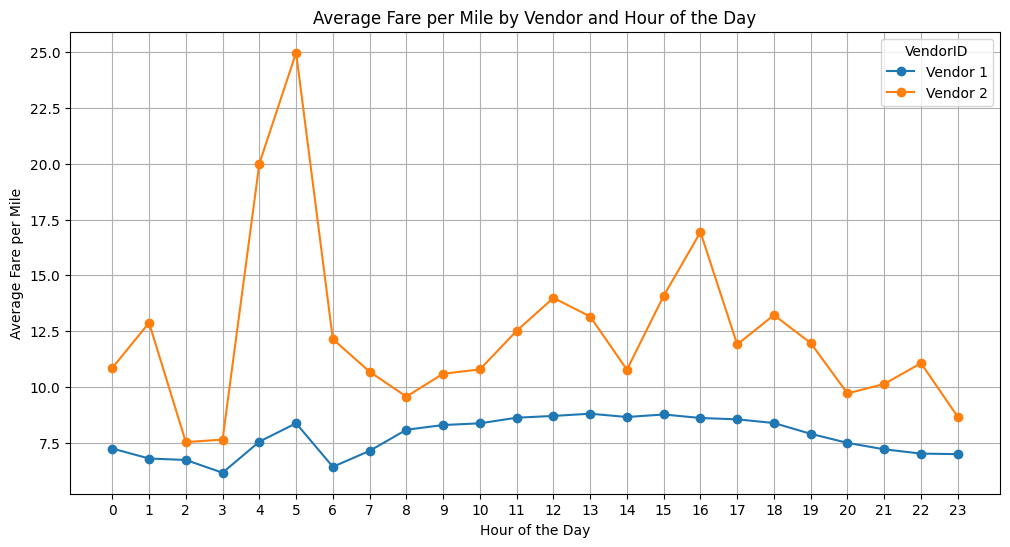

In [184]:
# Compare fare per mile for different vendors

avg_fare_per_mile_vendor_hour = df_non_zero.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(12, 6))
# Plot for Average Fare per Mile by Vendor and Hour
for vendor in avg_fare_per_mile_vendor_hour['VendorID'].unique():
    vendor_data = avg_fare_per_mile_vendor_hour[avg_fare_per_mile_vendor_hour['VendorID'] == vendor]
    plt.plot(vendor_data['hour'], vendor_data['fare_per_mile'], marker='o', label=f'Vendor {vendor}')
plt.title('Average Fare per Mile by Vendor and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(0, 24))
plt.legend(title='VendorID')
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


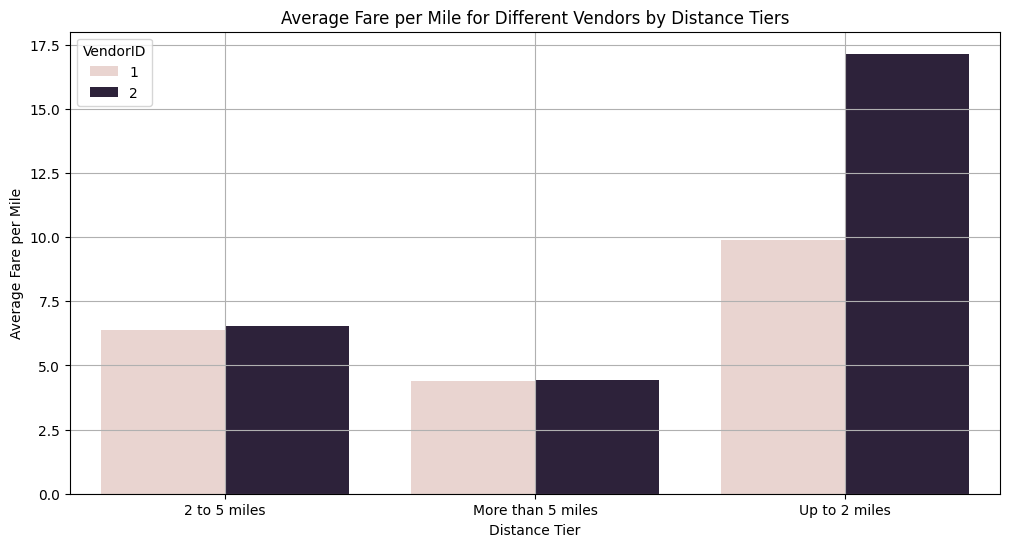

In [187]:
# Defining distance tiers

def assign_distance_tier(row):
    if row['trip_distance'] <= 2:
        return 'Up to 2 miles'
    elif row['trip_distance'] <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

df_non_zero['distance_tier'] = df_non_zero.apply(assign_distance_tier, axis=1)
# Calculate Fare per Mile for each trip
df_non_zero['fare_per_mile'] = df_non_zero['fare_amount'] / df_non_zero['trip_distance']

# Group by Vendor and Distance Tier to calculate the average fare per mile
avg_fare_per_mile_by_vendor_tier = df_non_zero.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Visualizing the data
plt.figure(figsize=(12, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=avg_fare_per_mile_by_vendor_tier)

plt.title('Average Fare per Mile for Different Vendors by Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.legend(title='VendorID', loc='upper left')
plt.grid(True)
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

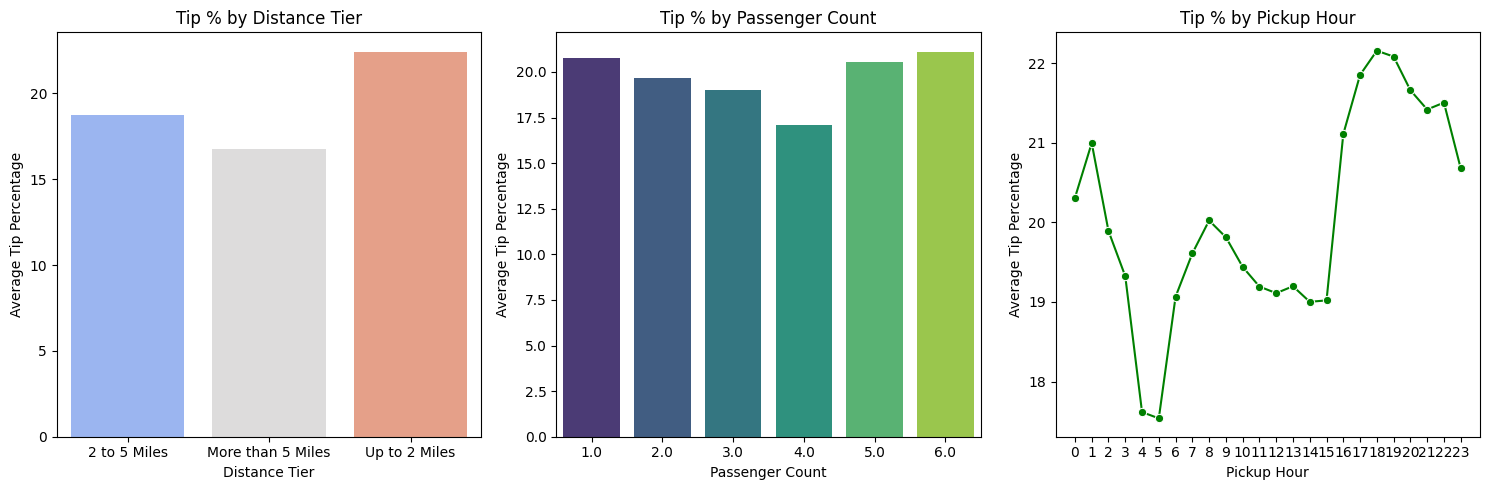

In [190]:
#  Analyze tip percentages based on distances, passenger counts and pickup times


# Filter trips with positive fare to avoid division by zero
df_tip = df_non_zero[df_non_zero['fare_amount'] > 0].copy()

# Calculate tip percentage for each trip
df_tip['tip_percentage'] = (df_tip['tip_amount'] / df_tip['fare_amount']) * 100

# Create distance tiers: Up to 2 miles, 2 to 5 miles, and More than 5 miles
def assign_distance_tier(distance):
    if distance <= 2:
        return 'Up to 2 Miles'
    elif distance <= 5:
        return '2 to 5 Miles'
    else:
        return 'More than 5 Miles'

df_tip['distance_tier'] = df_tip['trip_distance'].apply(assign_distance_tier)

# Ensure the pickup datetime is in datetime format and extract the hour
df_tip['tpep_pickup_datetime'] = pd.to_datetime(df_tip['tpep_pickup_datetime'], errors='coerce')
df_tip['hour'] = df_tip['tpep_pickup_datetime'].dt.hour

# Group and calculate average tip percentage by distance tier
avg_tip_by_distance = df_tip.groupby('distance_tier')['tip_percentage'].mean().reset_index()

# Group and calculate average tip percentage by passenger count
avg_tip_by_passenger = df_tip.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Group and calculate average tip percentage by pickup hour
avg_tip_by_hour = df_tip.groupby('hour')['tip_percentage'].mean().reset_index()

# Visualization: Plot average tip percentages across different factors
plt.figure(figsize=(15, 5))

# Tip percentage by distance tier
plt.subplot(1, 3, 1)
sns.barplot(data=avg_tip_by_distance, x='distance_tier', y='tip_percentage', palette='coolwarm')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage')
plt.title('Tip % by Distance Tier')

# Tip percentage by passenger count
plt.subplot(1, 3, 2)
sns.barplot(data=avg_tip_by_passenger, x='passenger_count', y='tip_percentage', palette='viridis')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.title('Tip % by Passenger Count')

# Tip percentage by pickup hour
plt.subplot(1, 3, 3)
sns.lineplot(data=avg_tip_by_hour, x='hour', y='tip_percentage', marker='o', color='green')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage')
plt.title('Tip % by Pickup Hour')
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

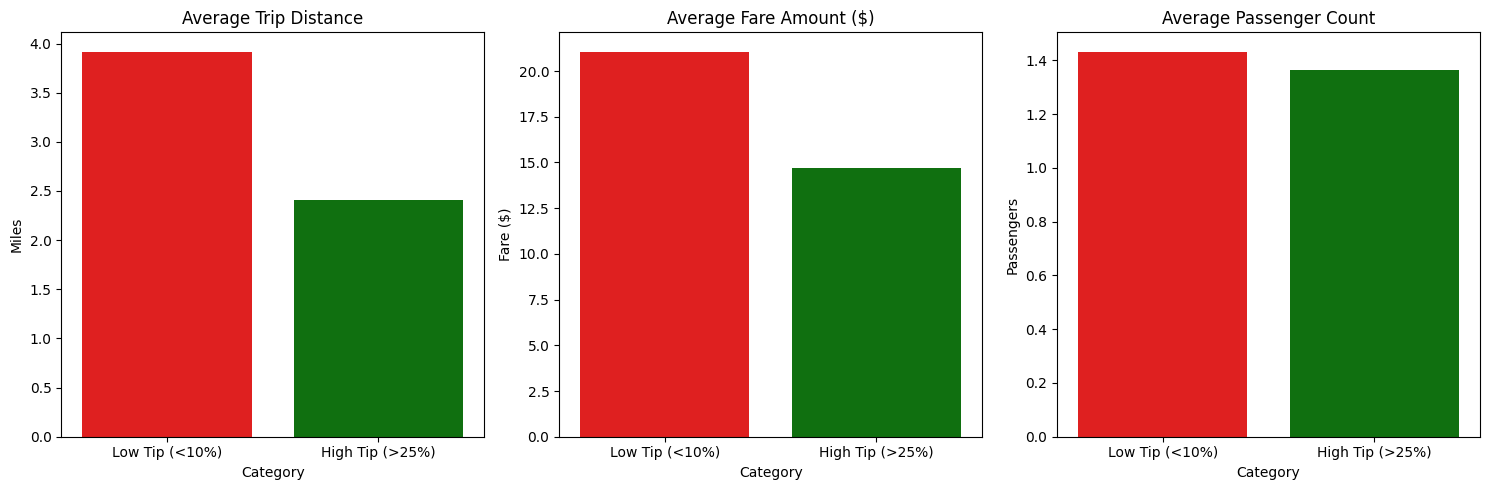

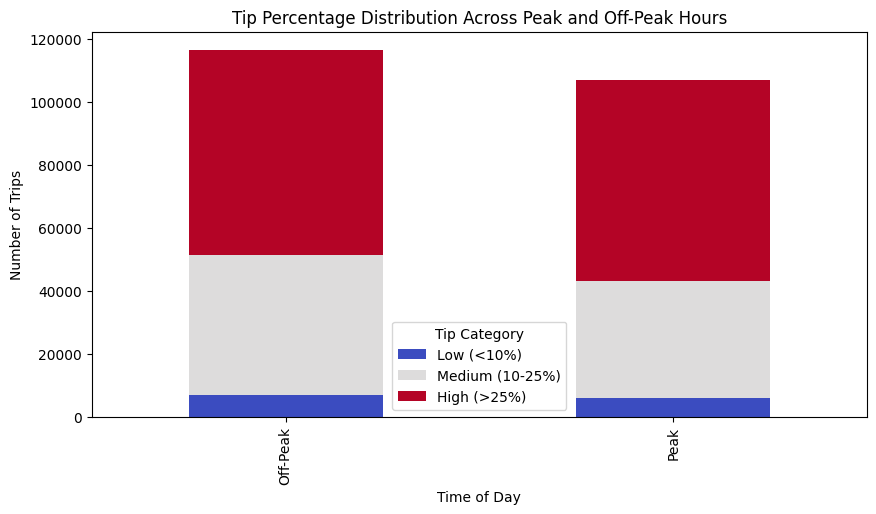

In [192]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_trips = df_tip[df_tip["tip_percentage"] < 10]
high_tip_trips = df_tip[df_tip["tip_percentage"] > 25]

comparison_df = pd.DataFrame({
    "Category": ["Low Tip (<10%)", "High Tip (>25%)"],
    "Avg Trip Distance": [low_tip_trips["trip_distance"].mean(), high_tip_trips["trip_distance"].mean()],
    "Avg Fare Amount": [low_tip_trips["fare_amount"].mean(), high_tip_trips["fare_amount"].mean()],
    "Avg Passenger Count": [low_tip_trips["passenger_count"].mean(), high_tip_trips["passenger_count"].mean()]
})

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distance
sns.barplot(x="Category", y="Avg Trip Distance", data=comparison_df, ax=axes[0], palette=["red", "green"])
axes[0].set_title("Average Trip Distance")
axes[0].set_ylabel("Miles")

# Fare
sns.barplot(x="Category", y="Avg Fare Amount", data=comparison_df, ax=axes[1], palette=["red", "green"])
axes[1].set_title("Average Fare Amount ($)")
axes[1].set_ylabel("Fare ($)")

# Passenger Count
sns.barplot(x="Category", y="Avg Passenger Count", data=comparison_df, ax=axes[2], palette=["red", "green"])
axes[2].set_title("Average Passenger Count")
axes[2].set_ylabel("Passengers")

plt.tight_layout()
plt.show()

# peak vs. off-peak
df_tip["time_category"] = df_tip["hour"].apply(
    lambda x: "Peak" if (7 <= x <= 10 or 17 <= x <= 21) else "Off-Peak"
)

tip_time_comparison = df_tip.groupby(["time_category", pd.cut(df_tip["tip_percentage"], bins=[0, 10, 25, 100], labels=["Low (<10%)", "Medium (10-25%)", "High (>25%)"])]).size().unstack().fillna(0)
tip_time_comparison.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm")
plt.title("Tip Percentage Distribution Across Peak and Off-Peak Hours")
plt.xlabel("Time of Day")
plt.ylabel("Number of Trips")
plt.legend(title="Tip Category")
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

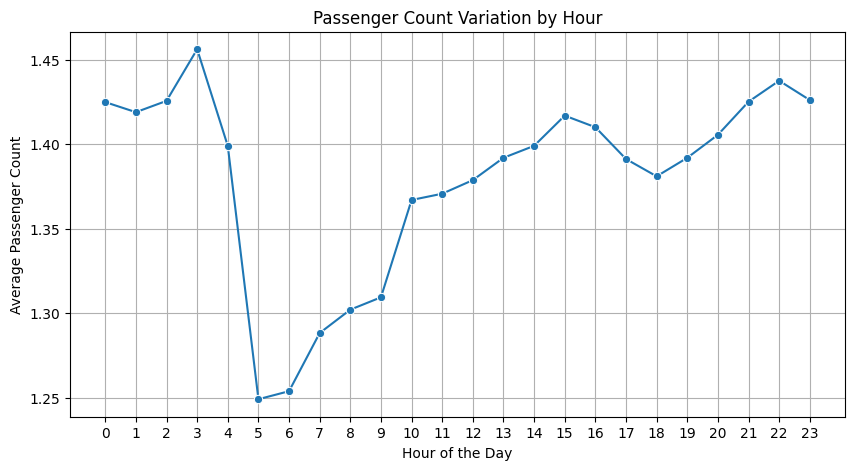

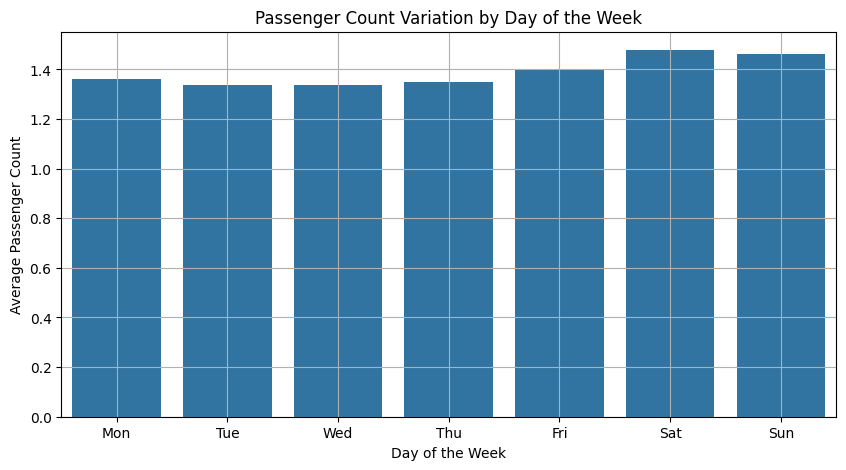

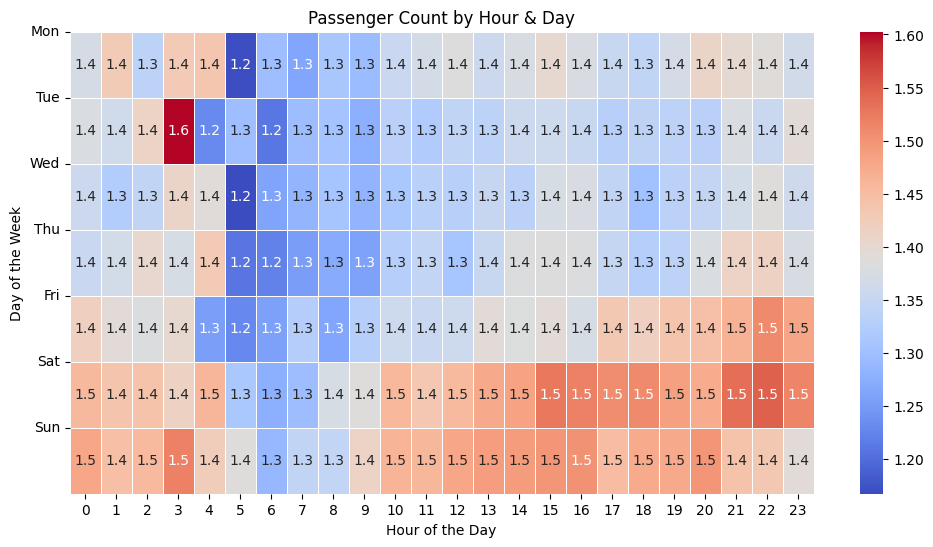

In [195]:
# See how passenger count varies across hours and days

# Extract hour and day of the week
df_non_zero["hour"] = df_non_zero["tpep_pickup_datetime"].dt.hour
df_non_zero["day_of_week"] = df_non_zero["tpep_pickup_datetime"].dt.dayofweek  # Monday=0, Sunday=6

# Group by hour and calculate the average passenger count
hourly_passenger_count = df_non_zero.groupby("hour")["passenger_count"].mean()

# Group by day of the week and calculate the average passenger count
daily_passenger_count = df_non_zero.groupby("day_of_week")["passenger_count"].mean()

# LPassenger Count by Hour of the Day
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_passenger_count.index, y=hourly_passenger_count.values, marker="o")
plt.title("Passenger Count Variation by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Passenger Count by Day of the Week
plt.figure(figsize=(10, 5))
sns.barplot(x=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], y=daily_passenger_count.values)
plt.title("Passenger Count Variation by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.grid()
plt.show()

# Passenger Count Across Hours & Days
pivot_table = df_non_zero.pivot_table(index="day_of_week", columns="hour", values="passenger_count", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Passenger Count by Hour & Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.yticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

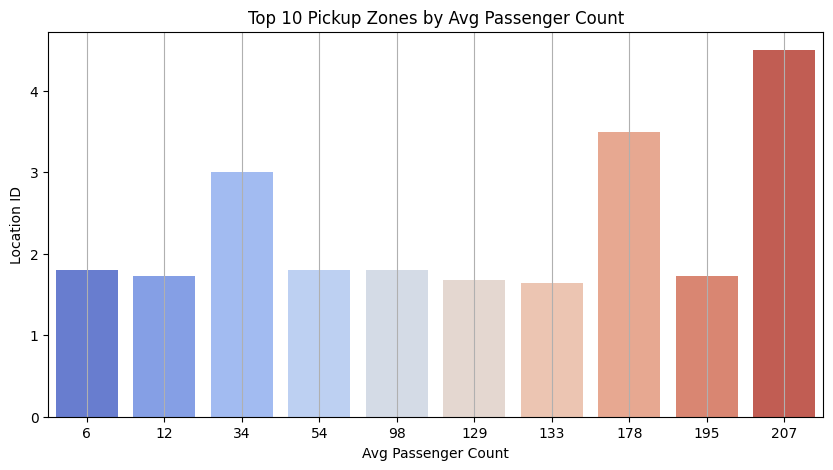

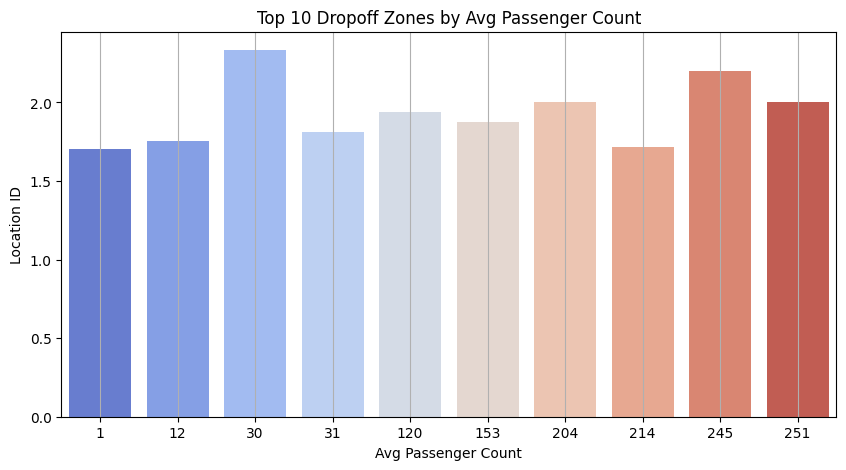

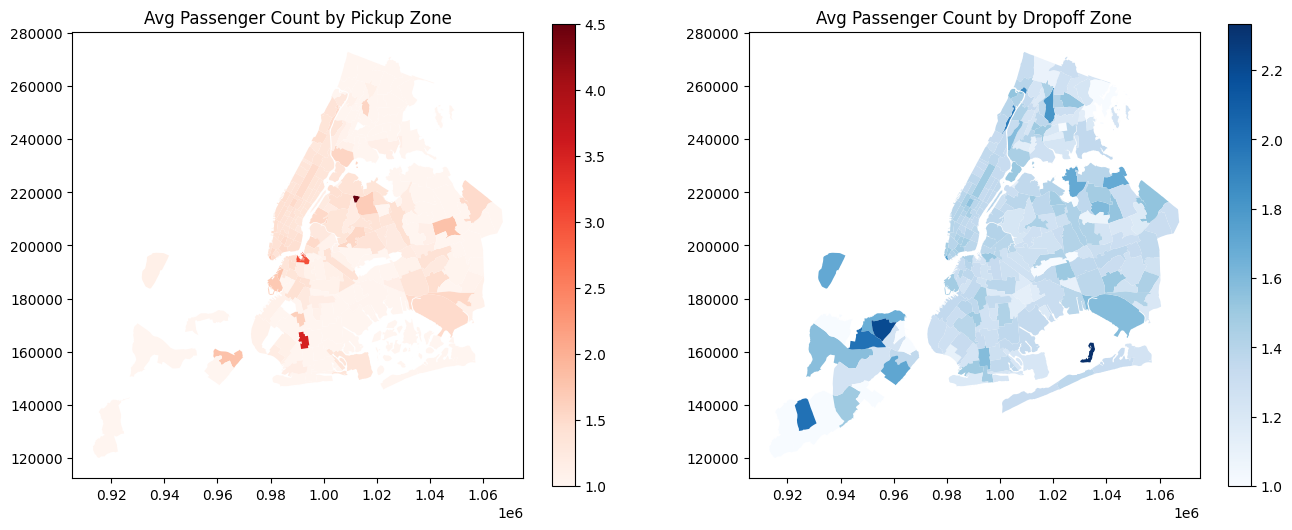

In [198]:
# How does passenger count vary across zones

pickup_passenger_count = df_non_zero.groupby("PULocationID")["passenger_count"].mean().reset_index()
dropoff_passenger_count = df_non_zero.groupby("DOLocationID")["passenger_count"].mean().reset_index()

# Renaming location id column names for better clarity in further steps
pickup_passenger_count.rename(columns={"PULocationID": "LocationID", "passenger_count": "avg_passenger_count_pickup"}, inplace=True)
dropoff_passenger_count.rename(columns={"DOLocationID": "LocationID", "passenger_count": "avg_passenger_count_dropoff"}, inplace=True)

# Merging with Zones Data
zones_pickup = zones.merge(pickup_passenger_count, on="LocationID", how="left")
zones_dropoff = zones.merge(dropoff_passenger_count, on="LocationID", how="left")

# Bar charts of Top Zones
top_pickup_zones = pickup_passenger_count.nlargest(10, "avg_passenger_count_pickup")
top_dropoff_zones = dropoff_passenger_count.nlargest(10, "avg_passenger_count_dropoff")

plt.figure(figsize=(10, 5))
sns.barplot(x=top_pickup_zones["LocationID"], y=top_pickup_zones["avg_passenger_count_pickup"], palette="coolwarm", errorbar=None)
plt.title("Top 10 Pickup Zones by Avg Passenger Count")
plt.xlabel("Avg Passenger Count")
plt.ylabel("Location ID")
plt.grid(axis="x")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=top_dropoff_zones["LocationID"], y=top_dropoff_zones["avg_passenger_count_dropoff"], palette="coolwarm", errorbar=None)
plt.title("Top 10 Dropoff Zones by Avg Passenger Count")
plt.xlabel("Avg Passenger Count")
plt.ylabel("Location ID")
plt.grid(axis="x")
plt.show()

# Spatial Visualization
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

zones_pickup.plot(column="avg_passenger_count_pickup", cmap="Reds", legend=True, ax=ax[0])
ax[0].set_title("Avg Passenger Count by Pickup Zone")

zones_dropoff.plot(column="avg_passenger_count_dropoff", cmap="Blues", legend=True, ax=ax[1])
ax[1].set_title("Avg Passenger Count by Dropoff Zone")

plt.show()



In [199]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_per_zone = df_non_zero.groupby("PULocationID")["passenger_count"].mean().reset_index()
avg_passenger_per_zone.rename(columns={"PULocationID": "LocationID", "passenger_count": "avg_passenger_count"}, inplace=True)
zones_with_trips = zones.merge(avg_passenger_per_zone, on="LocationID", how="left")

# Filling NaN values with 0 for zones with no trips
zones_with_trips["avg_passenger_count"].fillna(0, inplace=True)

zones_with_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  total_trips  avg_passenger_count  
0           1.0          9.0             1.111111  
1           2.0          1.0             1.000000  
2           3.0          7.0             1.000000  
3           4.0        284.0             1.450704  
4           NaN          0.0             0.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

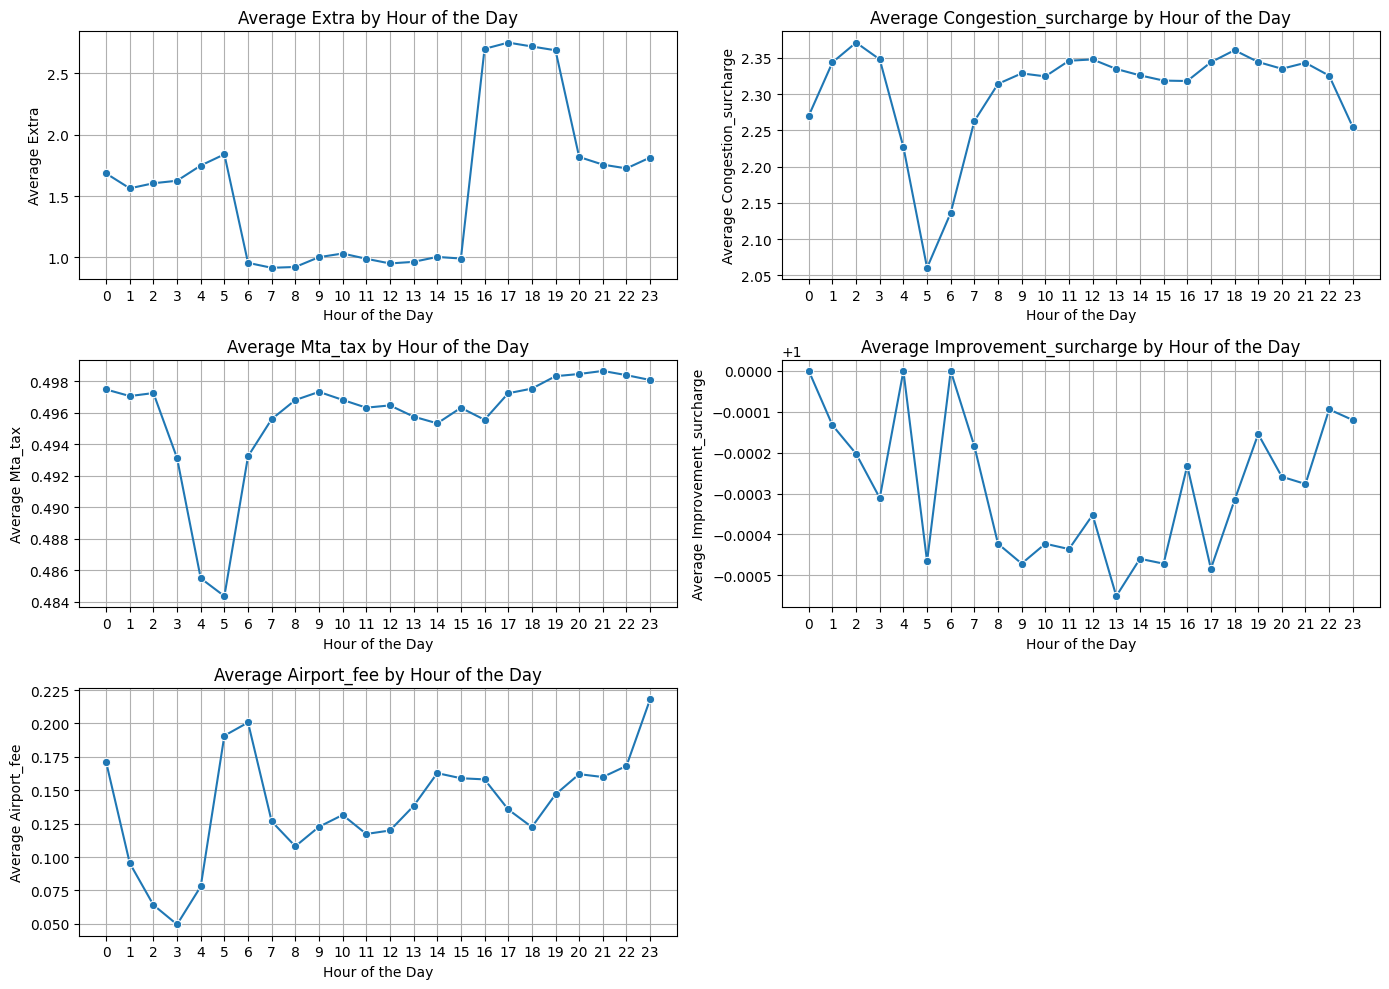

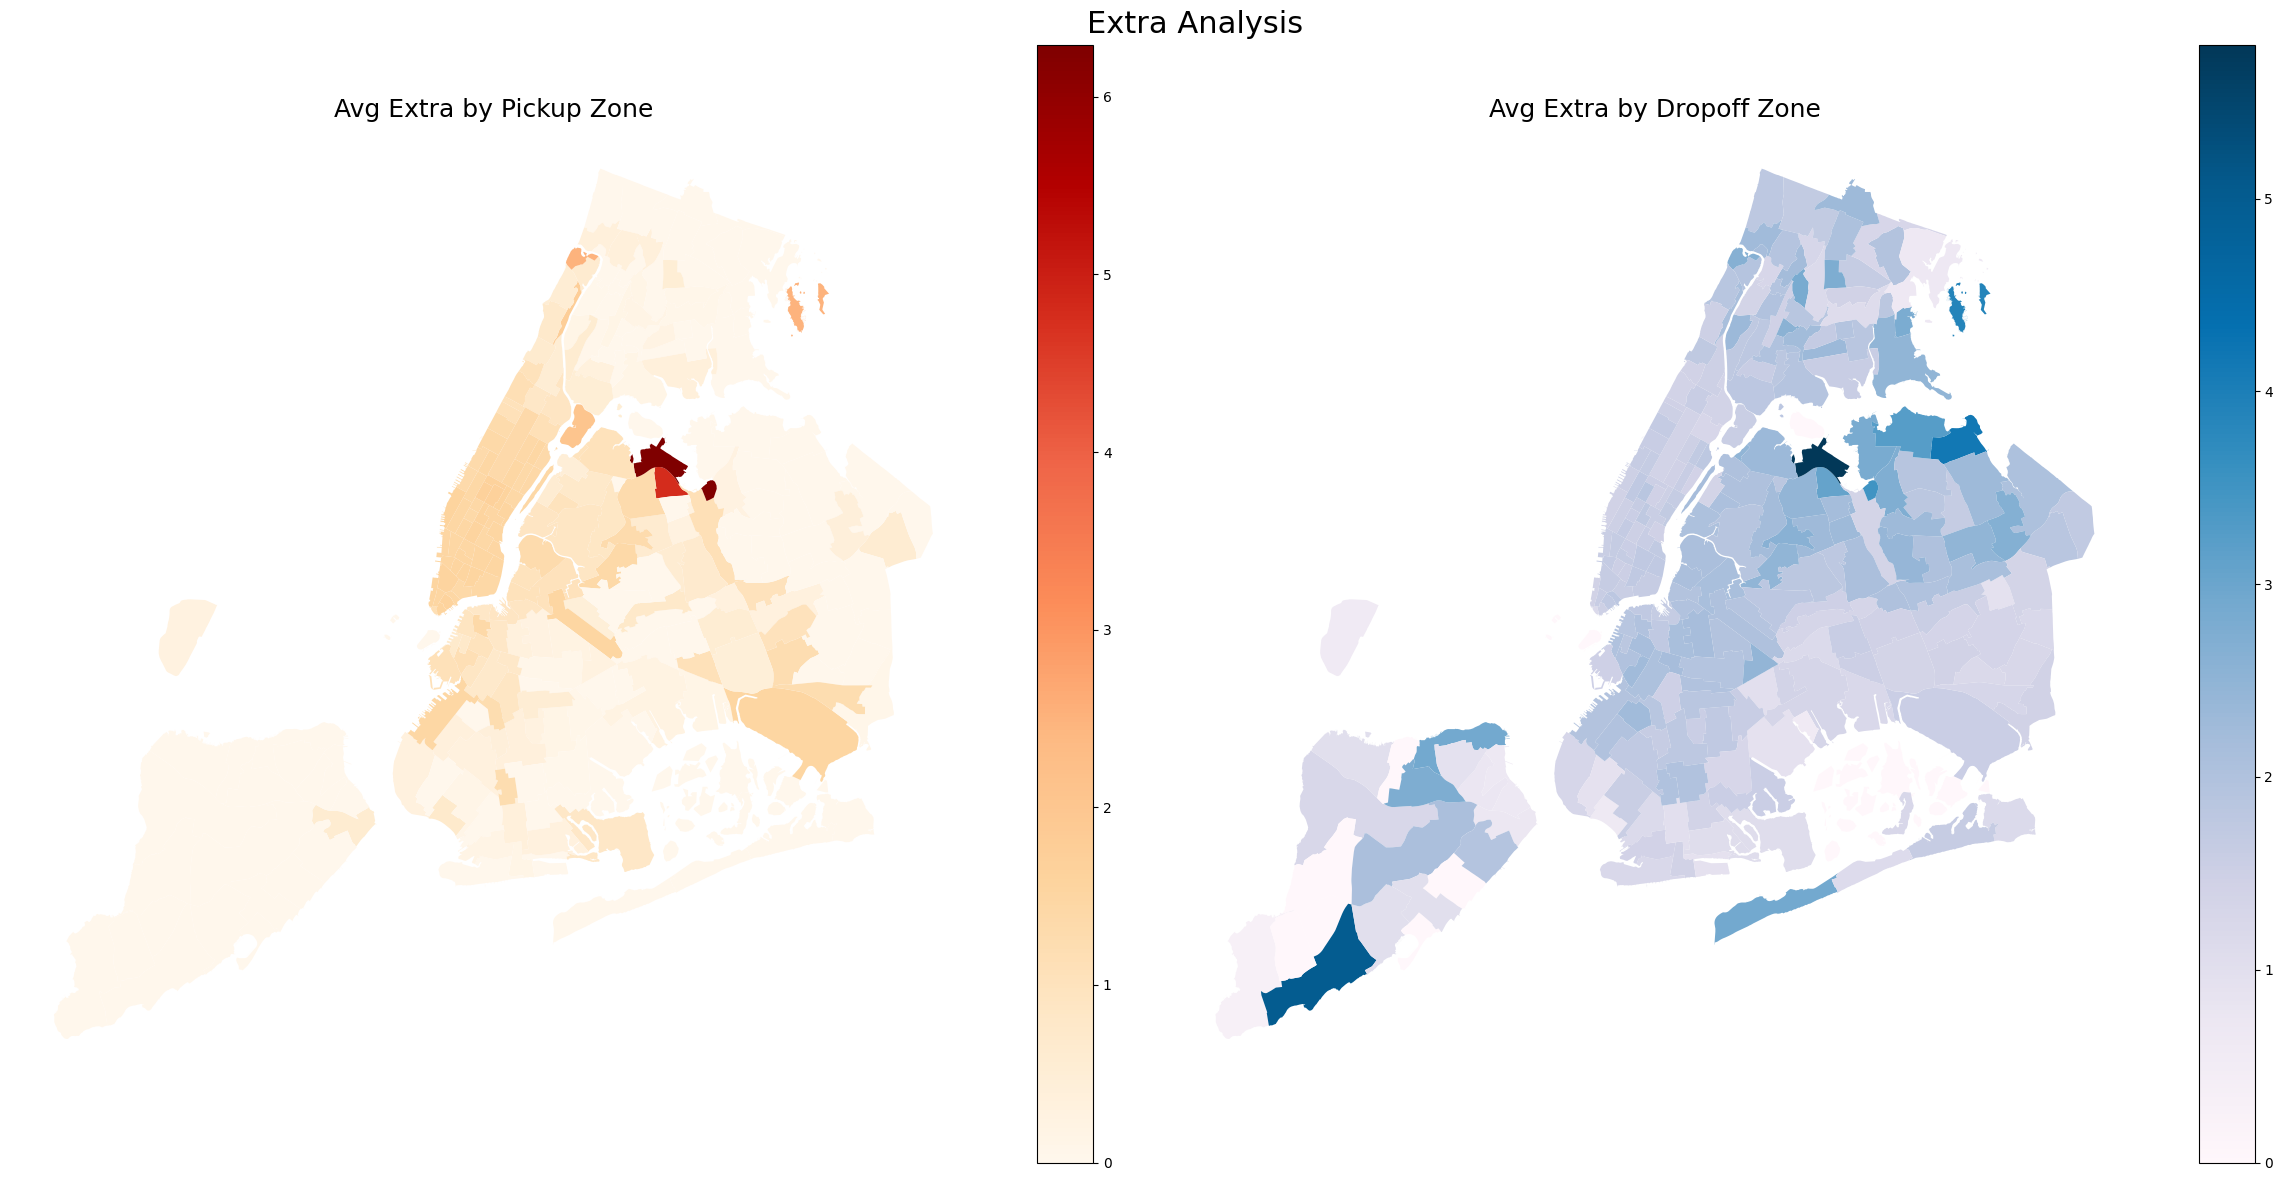

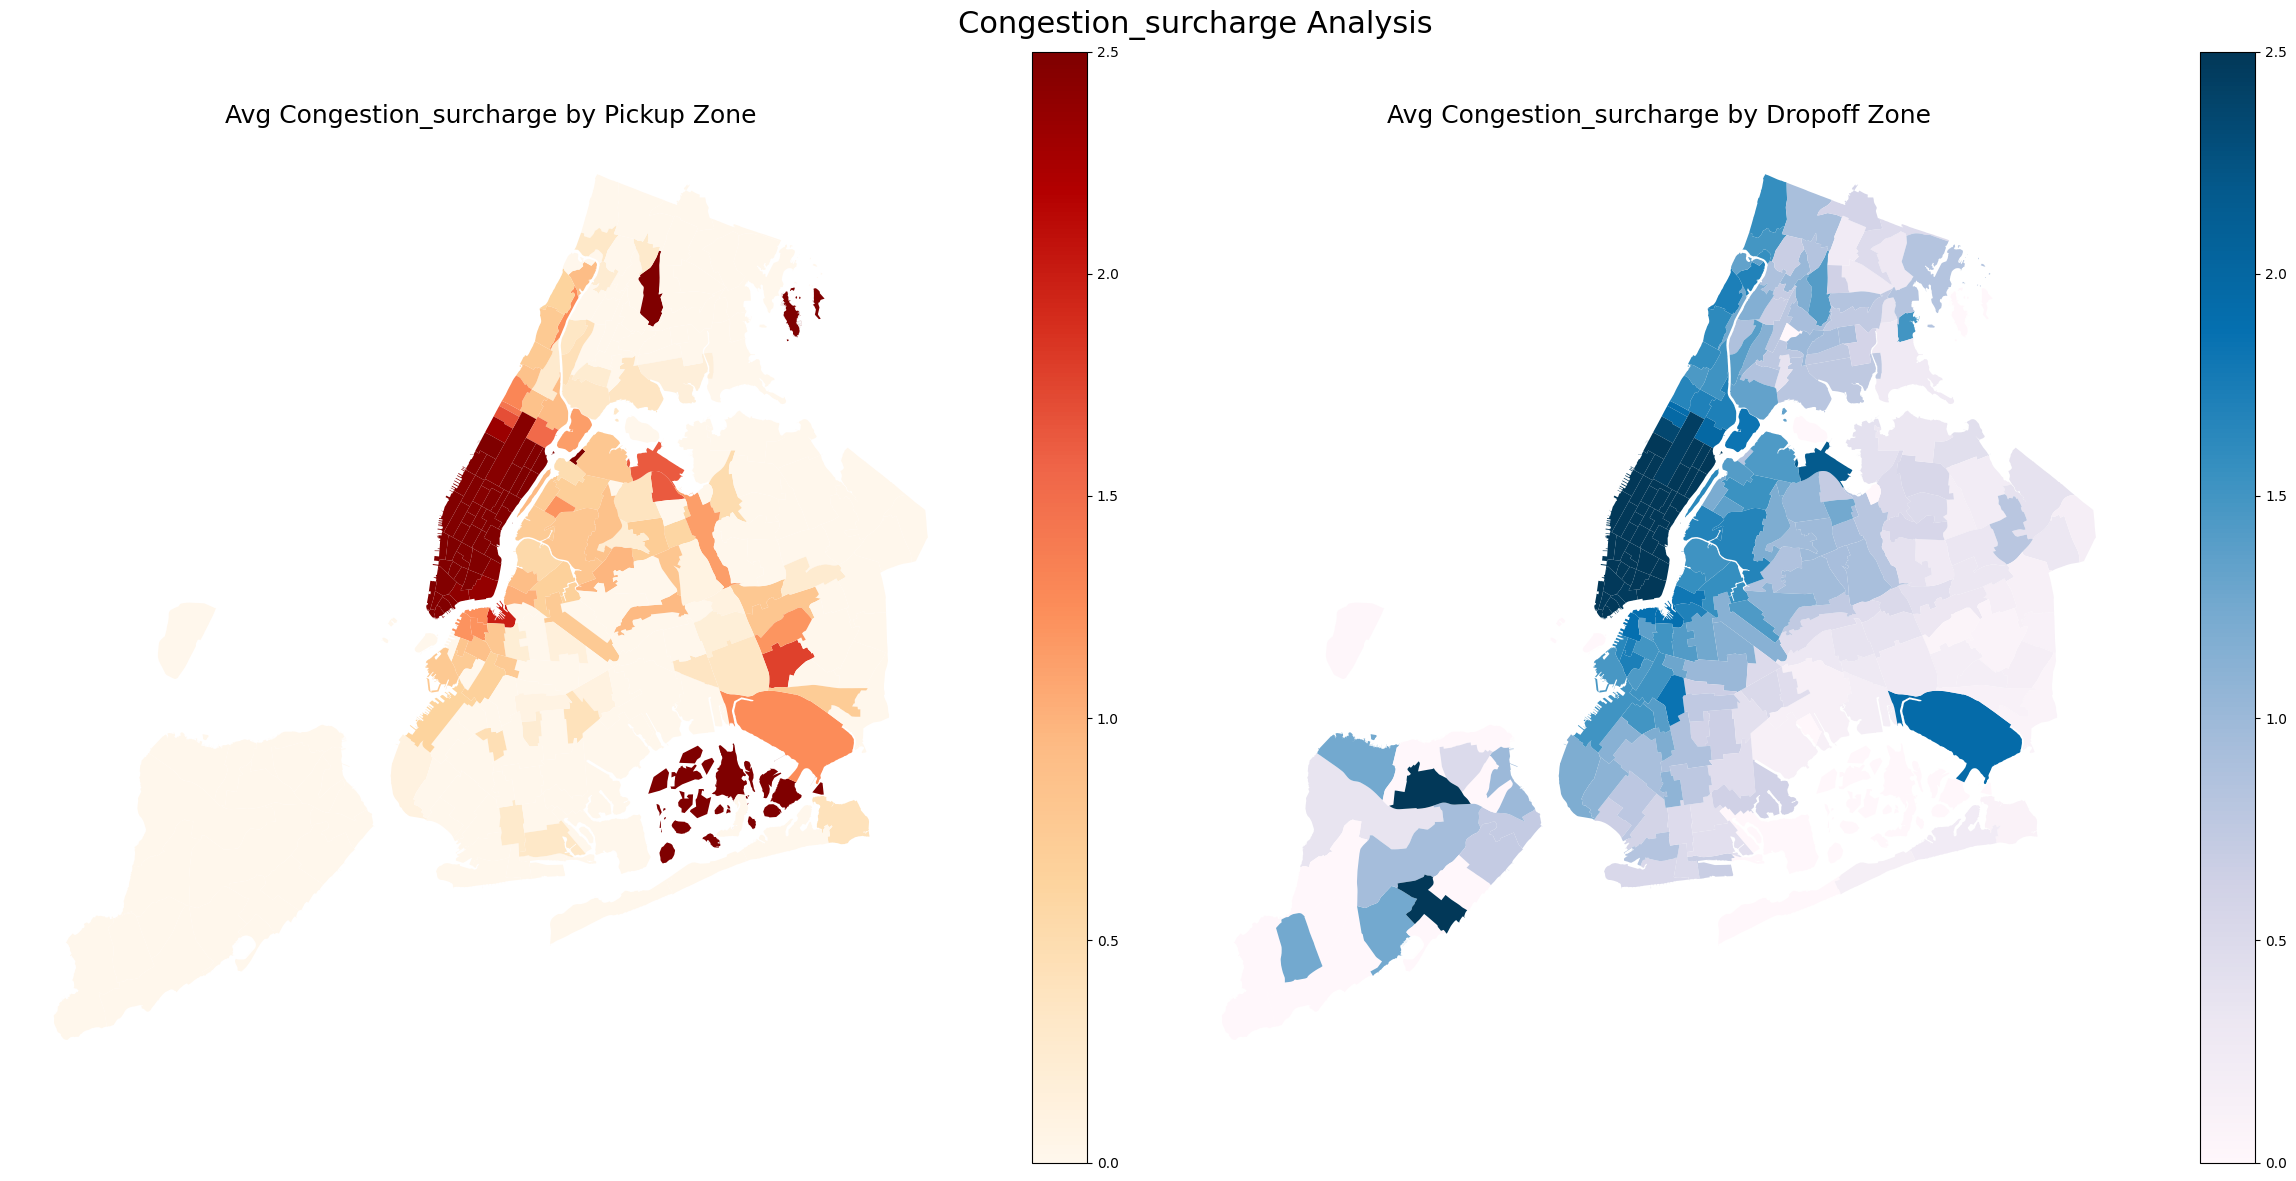

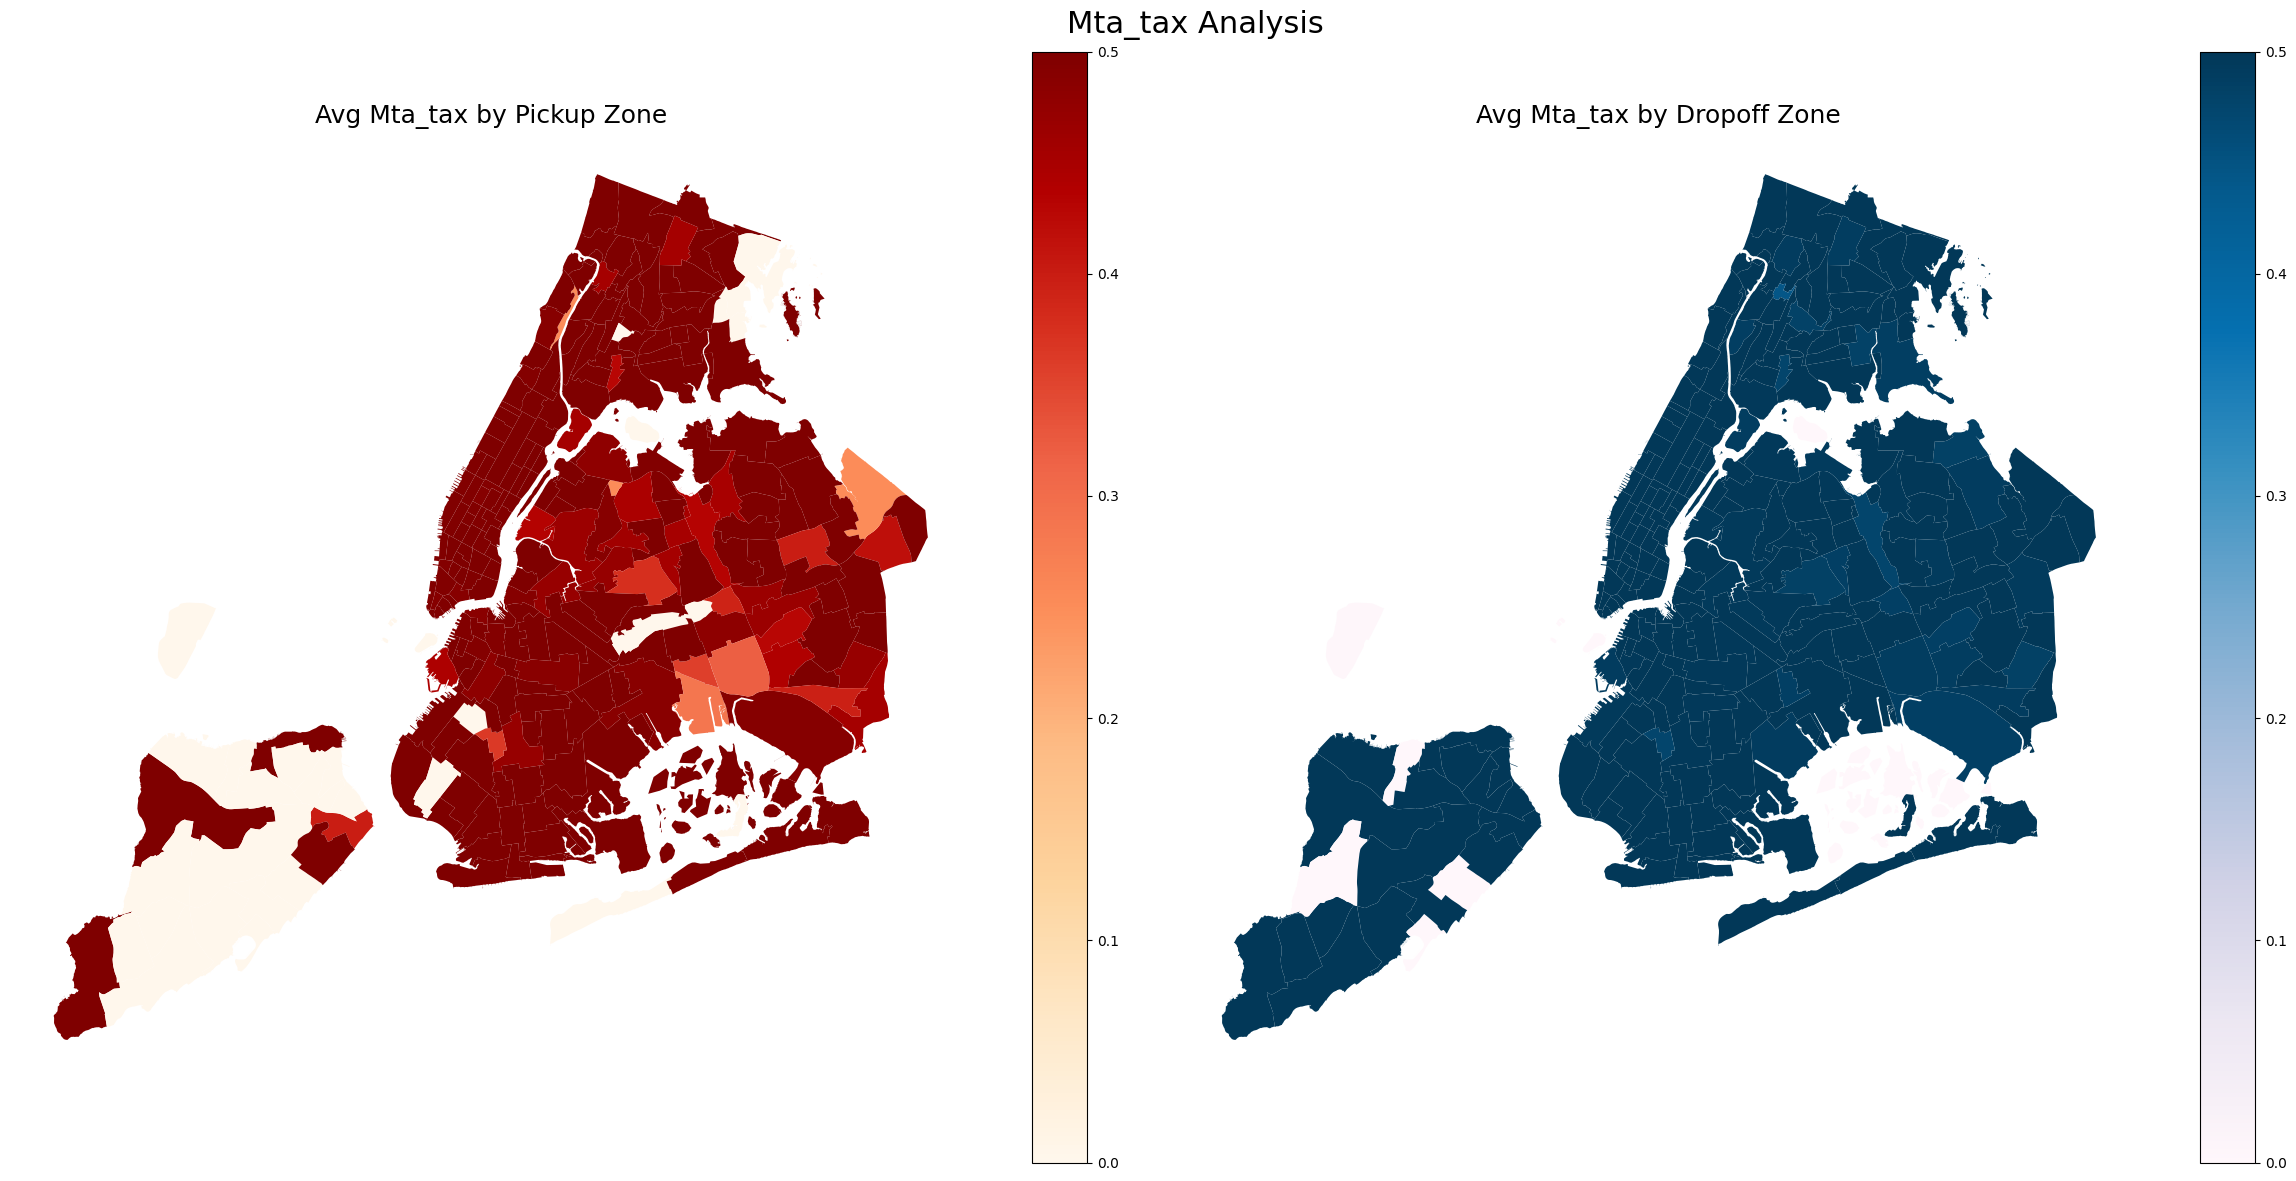

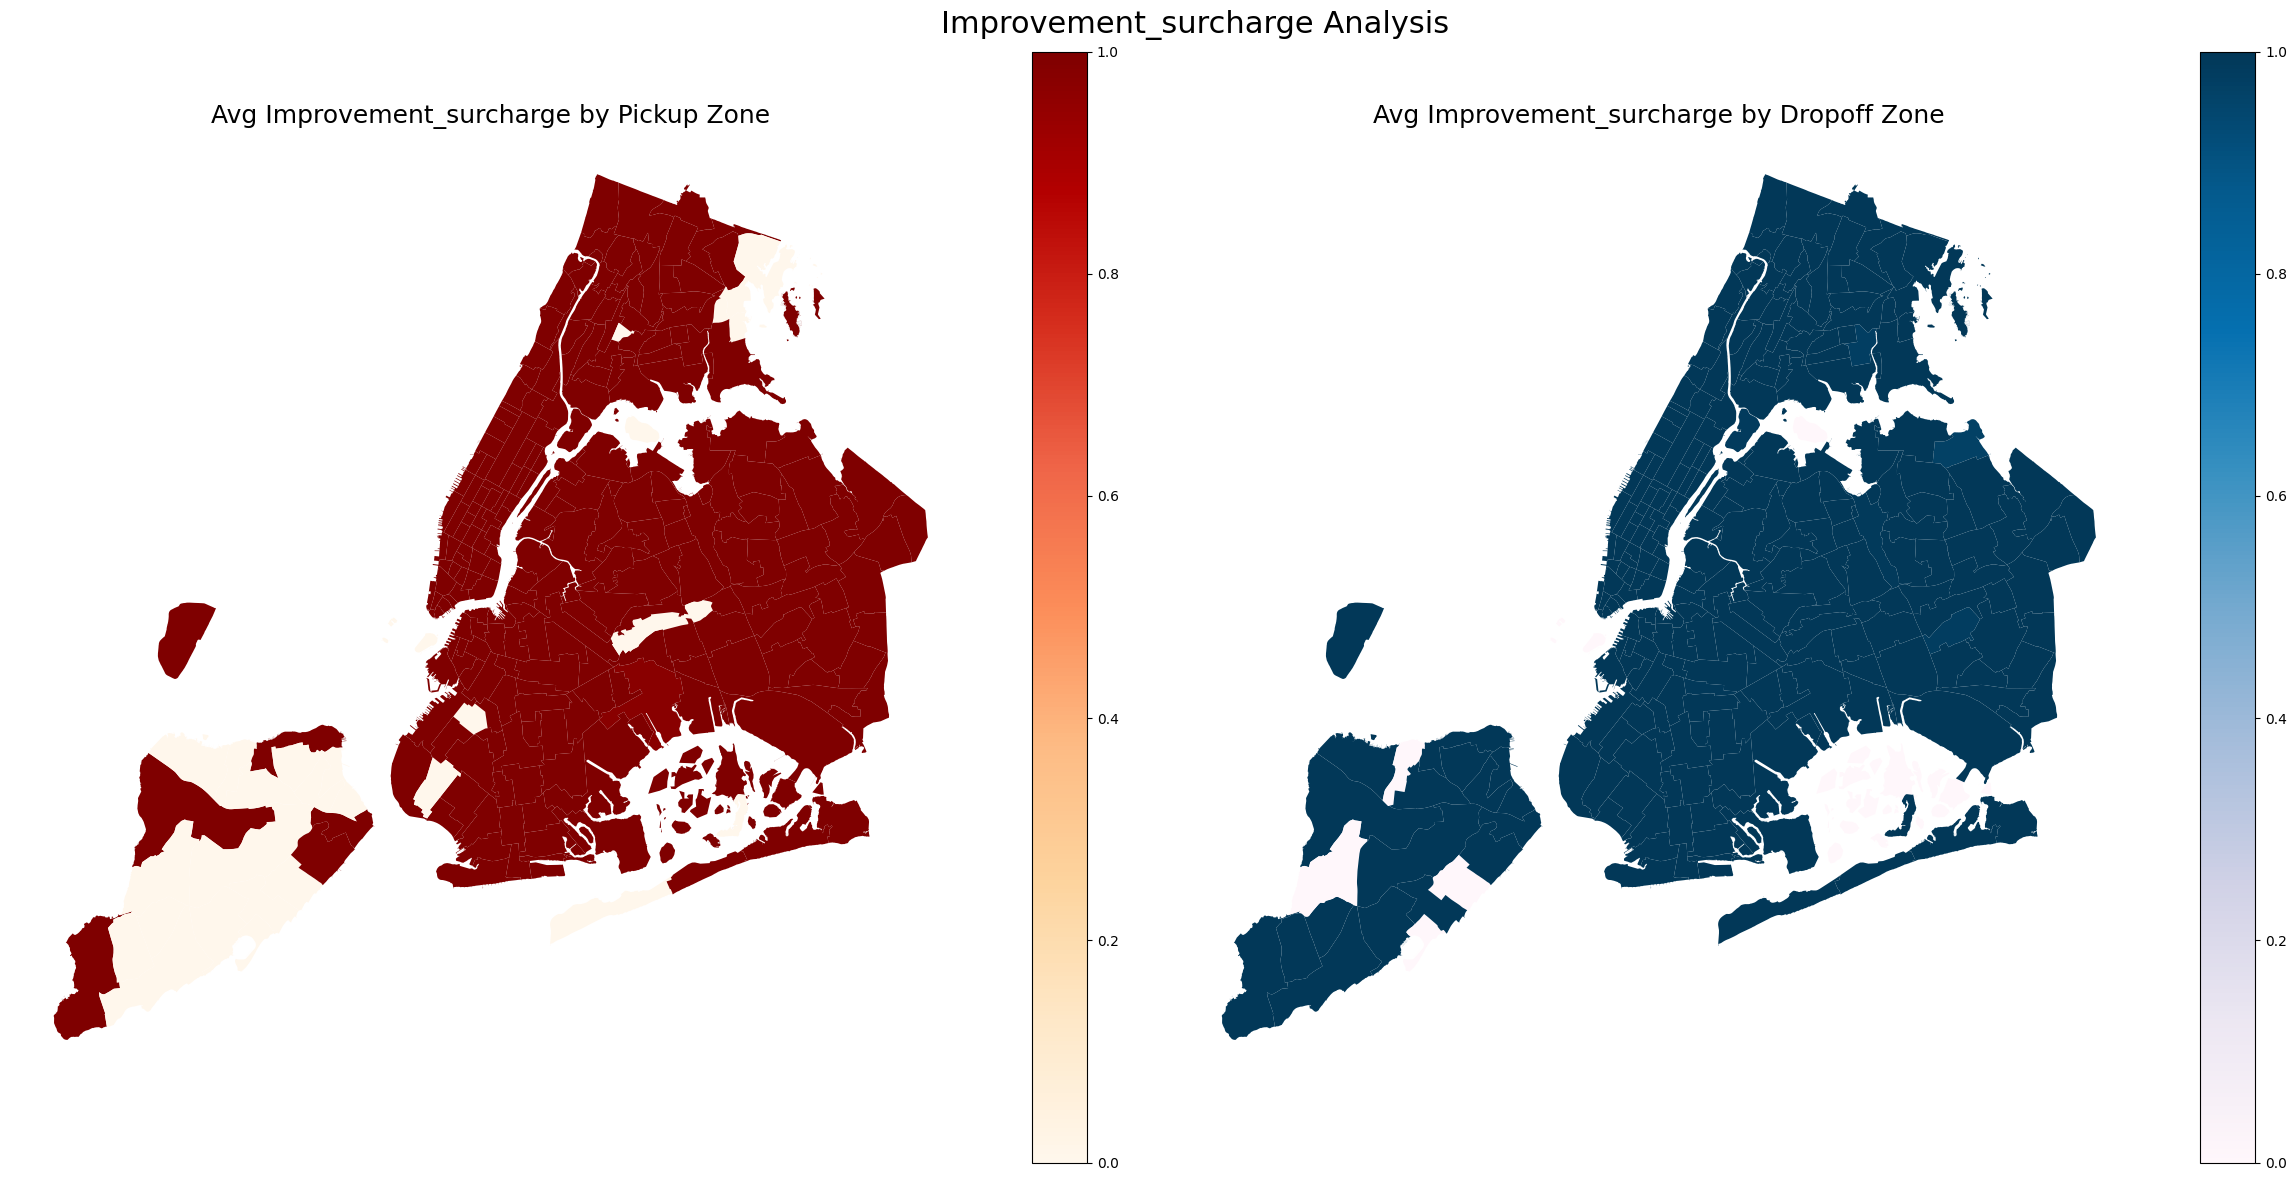

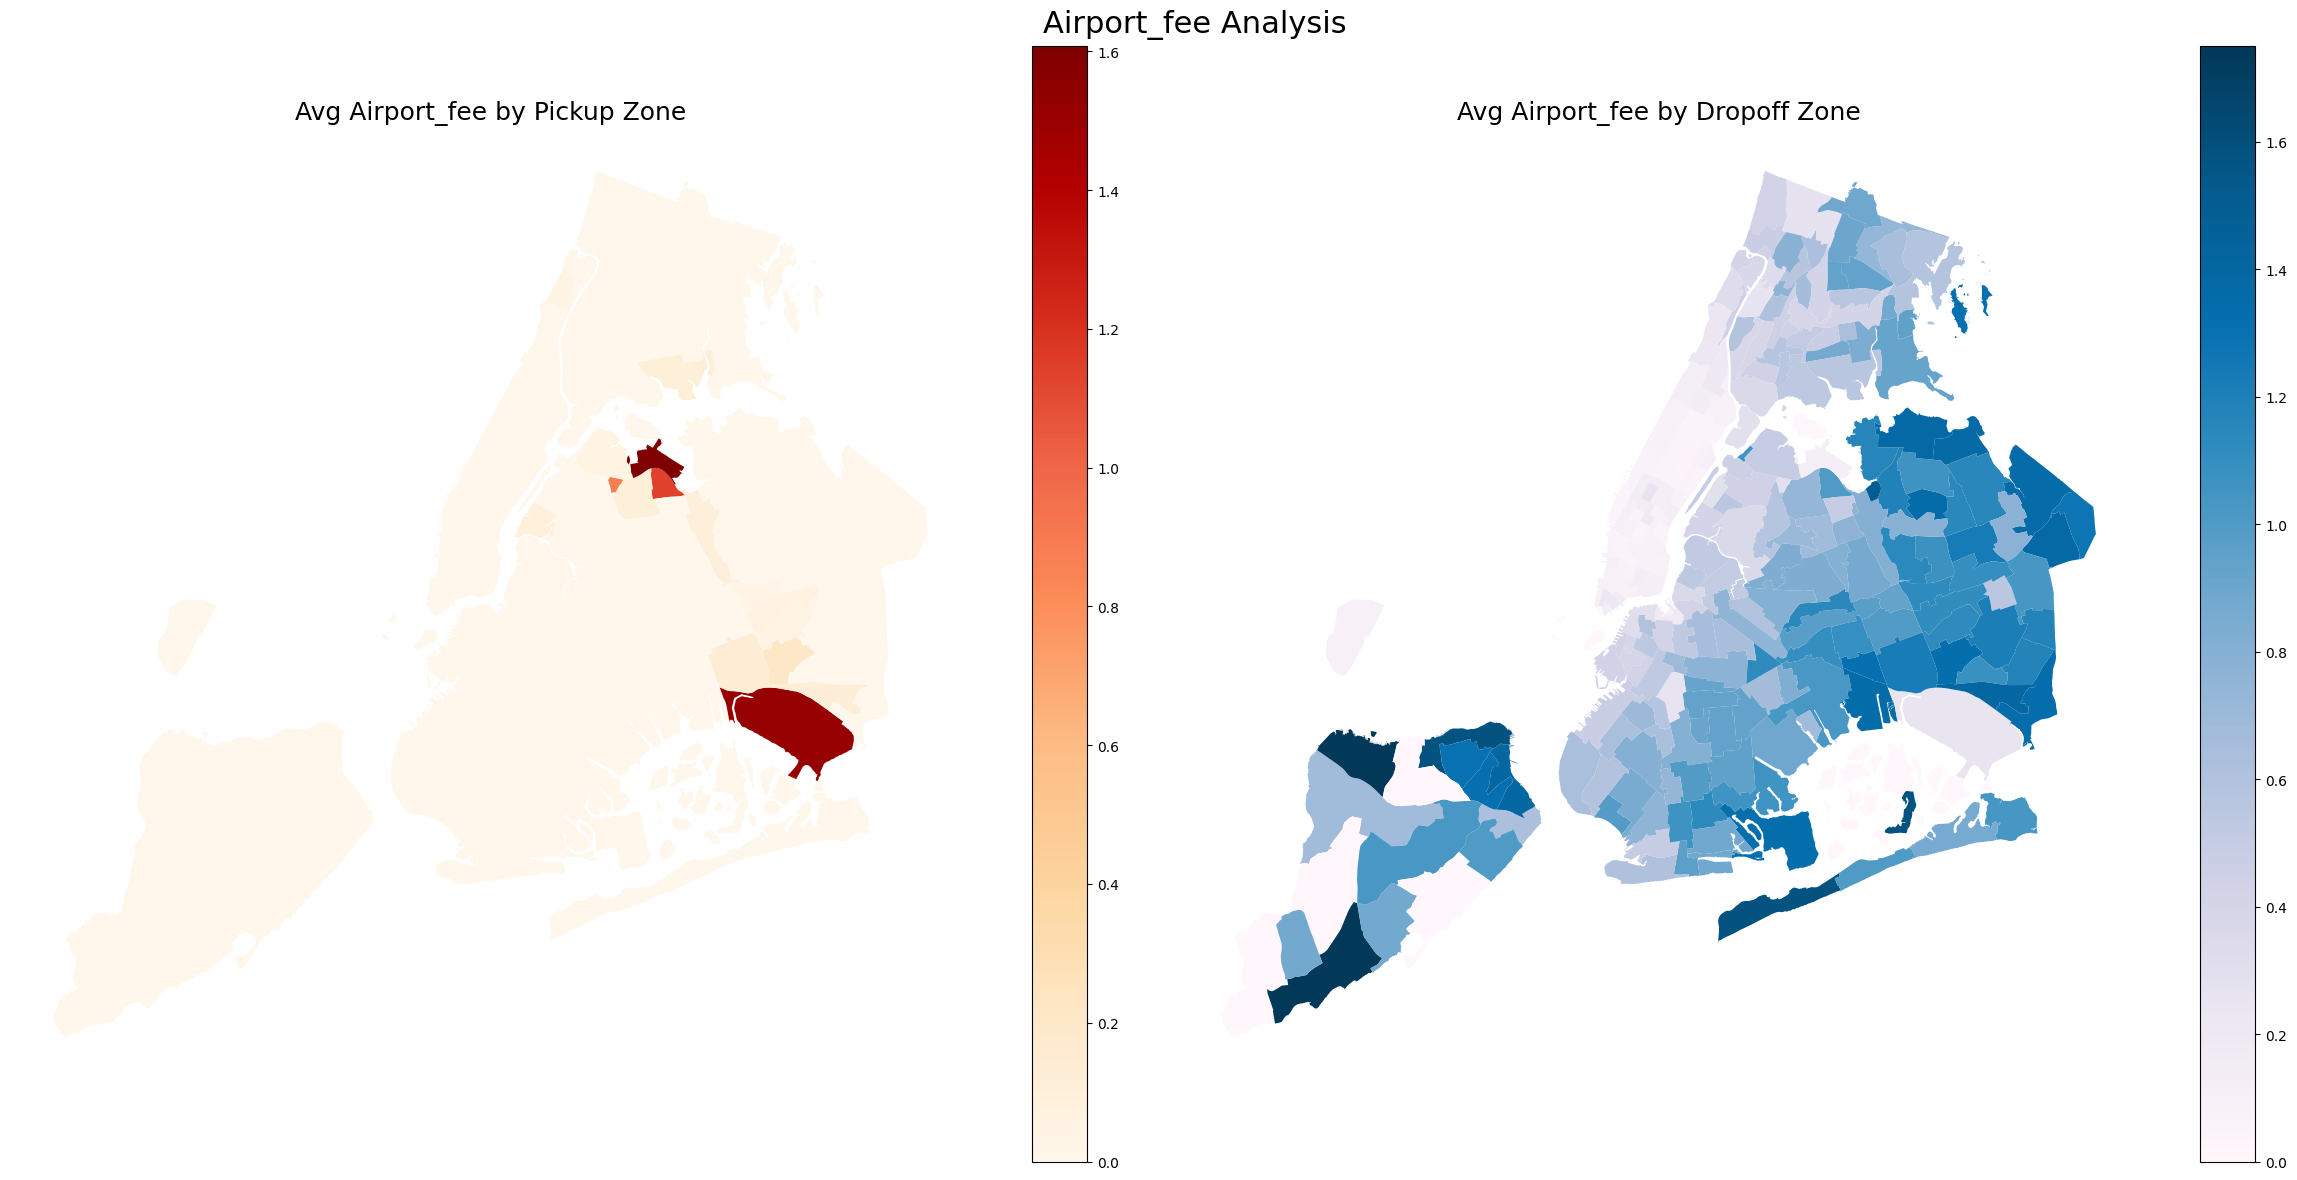

In [204]:
# How often is each surcharge applied?


surcharges = ["extra", "congestion_surcharge", "mta_tax", "improvement_surcharge", "Airport_fee"]

# Grouping by Pickup Zone
pickup_surcharges = df_non_zero.groupby("PULocationID")[surcharges].mean().reset_index()
pickup_surcharges.rename(columns={"PULocationID": "LocationID"}, inplace=True)
pickup_surcharges.columns = ["LocationID"] + [f"avg_{col}_pickup" for col in surcharges]

# Grouping by Dropoff Zone
dropoff_surcharges = df_non_zero.groupby("DOLocationID")[surcharges].mean().reset_index()
dropoff_surcharges.rename(columns={"DOLocationID": "LocationID"}, inplace=True)
dropoff_surcharges.columns = ["LocationID"] + [f"avg_{col}_dropoff" for col in surcharges]

# Merging with zones data
zones_with_trips = zones.merge(pickup_surcharges, on="LocationID", how="left")
zones_with_trips = zones_with_trips.merge(dropoff_surcharges, on="LocationID", how="left")

# Replacing NaN with 0
pickup_columns = [f"avg_{col}_pickup" for col in surcharges]
dropoff_columns = [f"avg_{col}_dropoff" for col in surcharges]
zones_with_trips[pickup_columns + dropoff_columns] = zones_with_trips[pickup_columns + dropoff_columns].fillna(0)
extra_by_hour = df_non_zero.groupby("hour")[surcharges].mean().reset_index()

# Lineplot for each surcharge
plt.figure(figsize=(14, 10))
for i, charge in enumerate(surcharges):
    plt.subplot(3, 2, i+1)
    sns.lineplot(x=extra_by_hour["hour"], y=extra_by_hour[charge], marker="o")
    plt.title(f"Average {charge.capitalize()} by Hour of the Day")
    plt.xlabel("Hour of the Day")
    plt.ylabel(f"Average {charge.capitalize()}")
    plt.xticks(range(24))
    plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting zones map for each surcharge
for charge in surcharges:
    fig, ax = plt.subplots(1, 2, figsize=(24, 12))
    
    zones_with_trips.plot(column=f"avg_{charge}_pickup", cmap="OrRd", legend=True, ax=ax[0])
    ax[0].set_title(f"Avg {charge.capitalize()} by Pickup Zone", fontsize=18)
    ax[0].axis('off')
    
    zones_with_trips.plot(column=f"avg_{charge}_dropoff", cmap="PuBu", legend=True, ax=ax[1])
    ax[1].set_title(f"Avg {charge.capitalize()} by Dropoff Zone", fontsize=18)
    ax[1].axis('off')
    
    plt.suptitle(f"{charge.capitalize()} Analysis", fontsize=22)
    plt.tight_layout()
    plt.show()


### **Findings**  

- **Weekend ride patterns remain stable throughout the day, whereas weekdays experience sharp spikes during morning and evening office hours.**  
- **Daytime revenue is nearly 8 times higher than nighttime**, highlighting significantly higher demand during the day.  
- **Fare per mile per passenger is highest for solo riders** and tends to decrease as the number of passengers increases.  
- **Fare per mile peaks at 4 AM**, while remaining relatively stable with minor fluctuations throughout the day.  
- **The average fare per mile is consistent across all days**, but **highest on Thursday and lowest on Friday**.  
- **Vendor 1’s fare per mile follows a daily trend, while Vendor 2’s remains mostly flat**, with a slight increase during the daytime.  
- **For long and medium-distance trips, both vendors charge the same fare per mile**, but for short trips, Vendor 2 charges nearly **double** that of Vendor 1.  
- **Tipping remains unaffected by passenger count** but **increases proportionally with trip distance**, showing **no major differences between peak and off-peak hours**.  
- **Average passenger count per ride peaks at midnight**, then declines until 6 AM before gradually increasing again.  
- **Passenger count remains stable across all weekdays**, indicating a consistent usage pattern.  
- **Extra charges peak between 4 PM and 8 PM**, aligning with the evening rush, and remain lowest during the daytime.  


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Peak Hour Allocation:** Assign more taxis between 4 PM - 8 PM, especially in high-demand zones (132, 138, 142, 161, 162). <br>
**Weekend vs. Weekday Approach:** Maintain steady coverage on weekends as demand is consistent, but allocate extra cabs in office-dense areas during weekday rush hours. <br>
**Midnight Surge Handling:** Increase fleet availability around midnight when passenger count peaks, ensuring quick service and reduced wait times. <br>
**Dynamic Dispatching:** Leverage real-time trip data to reposition idle taxis dynamically in zones showing increasing demand. <br>
**Nighttime Optimization:** Since nighttime revenue is significantly lower, consider alternative incentives or partnerships for drivers to stay active.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**High-Demand Zones:** Maintain high availability in zones 132, 138, 142, 161, 162 throughout the day.<br>
**Morning Rush Hours:** Focus cabs in residential areas early morning, then transition to office zones as the day progresses.<br>
**Tourist Hotspots (May & October):** Deploy additional taxis near airports, train stations, and key landmarks to capitalize on seasonal traffic.<br>
**Summer Vacation Adjustment (July-Sept):** Reduce fleet in tourist-heavy areas but redistribute towards business districts where demand remains stable.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### **Data-Driven Pricing Adjustments**  

#### **Findings**  
- **Short trips (≤2 miles) have the highest fare per mile** but generate lower total fares.  
- **Mid-range trips (2-5 miles) are the most cost-effective for passengers**, making them the most frequent.  
- **Long trips (>5 miles) have a lower fare per mile** but result in higher overall fares.  
- **Nighttime trips generate higher revenue** due to surcharges.  
- **Vendor pricing differs, but customer retention is influenced more by service quality than price alone.**  

#### **Recommendations**  

##### **1. Tiered Pricing Strategy**  
- **Increase base fare for short trips** to enhance profitability.  
- **Offer ride-sharing discounts for mid-range trips** to encourage more frequent rides.  

##### **2. Time-Based Pricing Adjustments**  
- **Maintain higher fares during nighttime (11 PM - 5 AM)** with clear surcharge explanations.  
- **Introduce off-peak pricing** to promote more daytime travel.  

##### **3. Transparency & Customer Retention**  
- **Clearly display fare breakdowns in the app** to build customer trust.  
- **Implement loyalty rewards and discounts** to encourage repeat customers.  
